In [2]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [3]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [4]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/asn7yfxccx9hqi4afrnw685xw6c6382z-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [5]:
my_seurat_extend_with_domc_package <- 
    "/home/ykazci/.guix-extra-profiles/seurat_extend_w_DOMC/seurat_extend_w_DOMC/site-library"

In [6]:
.libPaths(new = my_seurat_extend_with_domc_package, 
          include.site = FALSE)

In [7]:
.libPaths()

[1] "/gnu/store/3cgldbp12ywyck7dn7h3p1rx5qh2c9dy-profile/site-library"         
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [8]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [9]:
library(SeuratExtend)

Loading required package: SeuratExtendData



In [10]:
GBonilla_seurat <-  
    readRDS(here::here('r_objects', 'GBonilla_seurat_w_Regulons.RDS'))

In [11]:
GBonilla_seurat

An object of class Seurat 
14539 features across 43269 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

In [12]:
# Viewing the outputs
tf_auc <- GBonilla_seurat@misc$SCENIC$RegulonsAUC
head(tf_auc, 4:5)

regulons
cells                 Ahr         Arid3a      Arntl      Atf1        Atf3      
  BRS02R1GGGATCGATATG 0.023081447 0.026144271 0.00000000 0.023973053 0.01802486
  BRS02R1ATTCAATATCAC 0.030983534 0.009139469 0.04393093 0.023595136 0.05270828
  BRS02R1ATTTCCGTCCGC 0.007130256 0.011320200 0.02234637 0.003861321 0.10247146
  BRS02R1TAGCGCGAGACC 0.006652455 0.000000000 0.00000000 0.008971410 0.02766982

In [13]:
identical(rownames(tf_auc), Cells(GBonilla_seurat))

[1] TRUE

In [14]:
library(magrittr)

In [15]:
(GBonilla_seurat$main_cell_types == 'Endothelial cells') %>% table()

.
FALSE  TRUE 
37389  5880 

In [16]:
is_EC <- GBonilla_seurat$main_cell_types == 'Endothelial cells'

In [17]:
tf_auc_EC <- tf_auc[is_EC,]

In [18]:
tf_auc_EC %>% dim()

[1] 5880  223

In [19]:
tf_zscore_EC <- CalcStats(tf_auc_EC, f = GBonilla_seurat$treatment_and_cell_types[is_EC], order = "p", n = 5, t = TRUE)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: 'mosaic'


The following object is masked from 'package:Matrix':

    mean


The following object is masked from 'package:ggplot2':

    stat


The following objects are masked from 'package:dplyr':

    count, do, tally


The following objects are masked from 'package:stats':

    IQR, binom.test, cor, cor.test, cov, fivenum, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from 'package:base':

    max, mean, min, prod, range, 

In [20]:
my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)


Attaching package: 'scales'


The following object is masked from 'package:mosaic':

    rescale



Attaching package: 'rlang'


The following object is masked from 'package:magrittr':

    set_names


Using id as id variables

Loading required package: viridis

Loading required package: viridisLite


Attaching package: 'viridis'


The following object is masked from 'package:scales':

    viridis_pal




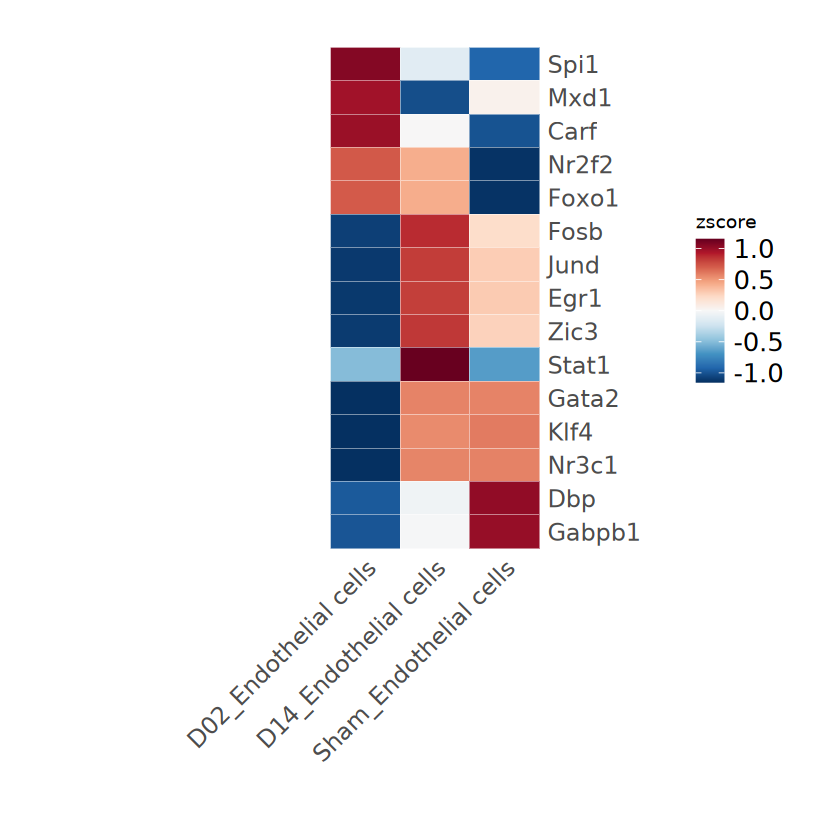

In [21]:
options(repr.plot.width = 7, repr.plot.height = 7) 

Heatmap(tf_zscore_EC, lab_fill = "zscore") + 
 ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 7), "cm")) +
 my_theme

In [22]:
GBonilla_seurat %>% levels()

[1] "epithelial-like cells"         "granulocytes"                 
 [3] "Border-associated macrophages" "myeloid-derived cells"        
 [5] "dendritic cells"               "Vascular Mural Cells"         
 [7] "Endothelial cells"             "microglia"                    
 [9] "oligodendrocytes"              "natural killer cells"         
[11] "B cells"                       "T cells"                      
[13] "mast cells"

In [23]:
EC_seurat <- GBonilla_seurat %>% subset(idents = 'Endothelial cells')

In [24]:
EC_seurat

An object of class Seurat 
14539 features across 5880 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

In [25]:
DefaultAssay(EC_seurat) <- 'TF'

In [26]:
Idents(EC_seurat) <- 'treatment_and_cell_types'

In [27]:
my_margin <- ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 1), "cm"))  # Add margin to top, right, bottom, and left margins, respectively.


Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths


The following objects are masked from 'package:Matrix':

    expand, pack, unpack


The following object is masked from 'package:magrittr':

    extract


Warning message in WaterfallPlot.default(matr = t(Std.matr$matr), f = Std.matr$f, :
"strings not representable in native encoding will be translated to UTF-8"


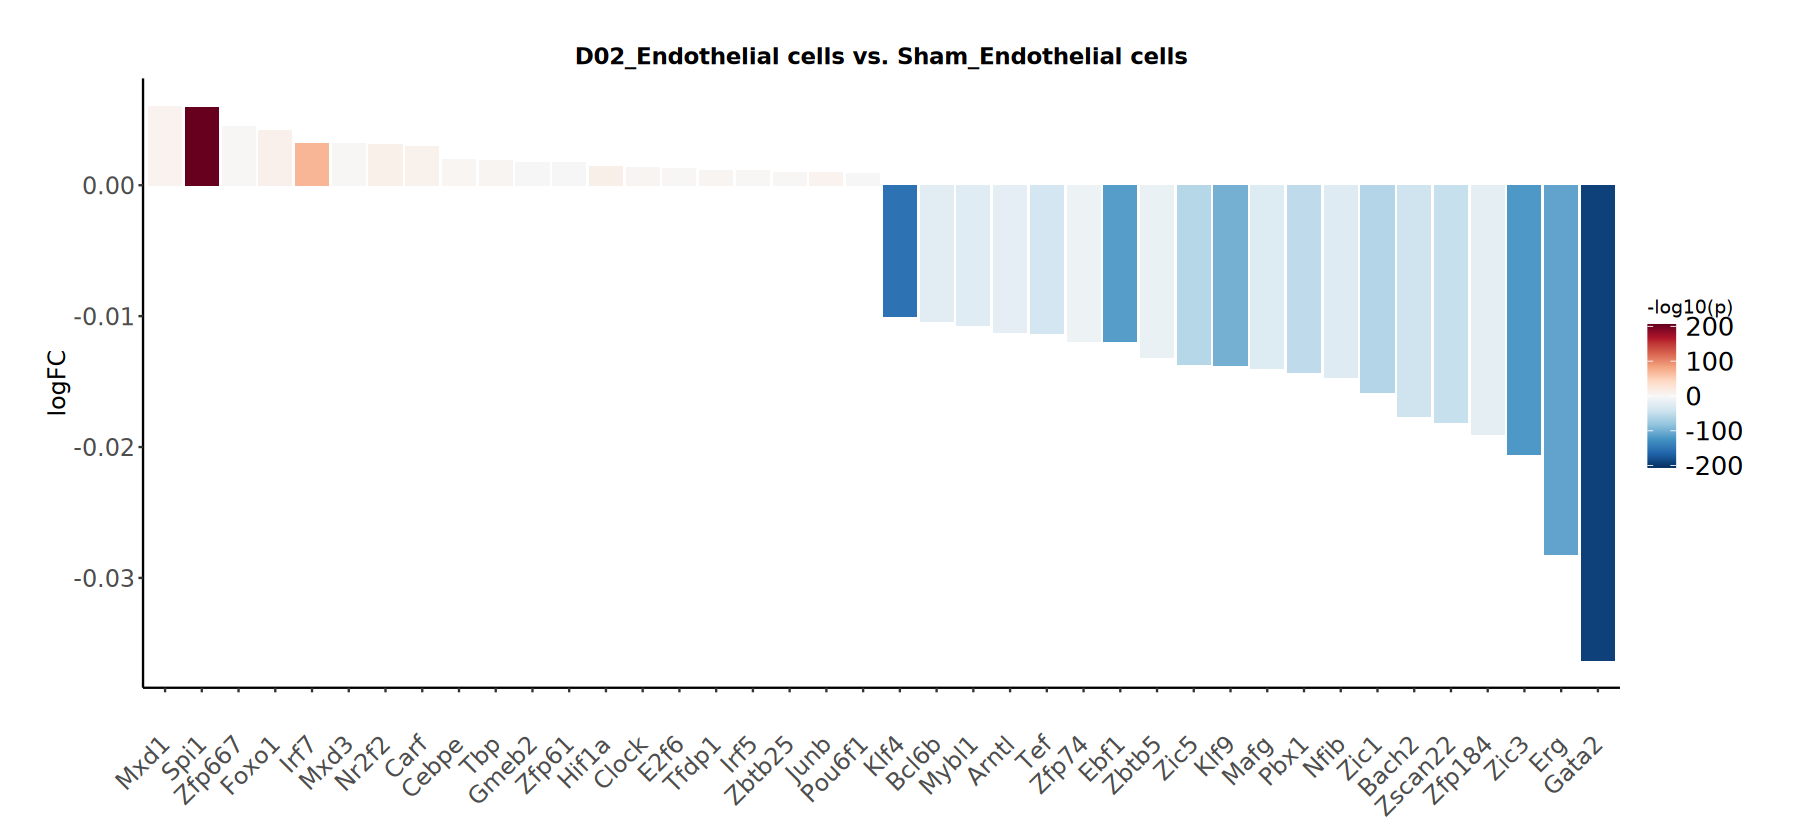

In [28]:
options(repr.plot.width = 15, repr.plot.height = 7) 

# Creating a waterfall plot to compare regulon activity between monocytes and CD8 T cells
WaterfallPlot(
  EC_seurat,
  features = rownames(EC_seurat),  # Using all available TFs in the "TF" assay
  ident.1 = "D02_Endothelial cells",      # First group of cells
  ident.2 = "Sham_Endothelial cells",     # Second group of cells
  exp.transform = FALSE,      # Disable transformation of expression data
  top.n = 20                  # Display the top 20 most differentially active TFs
) + my_theme + my_margin

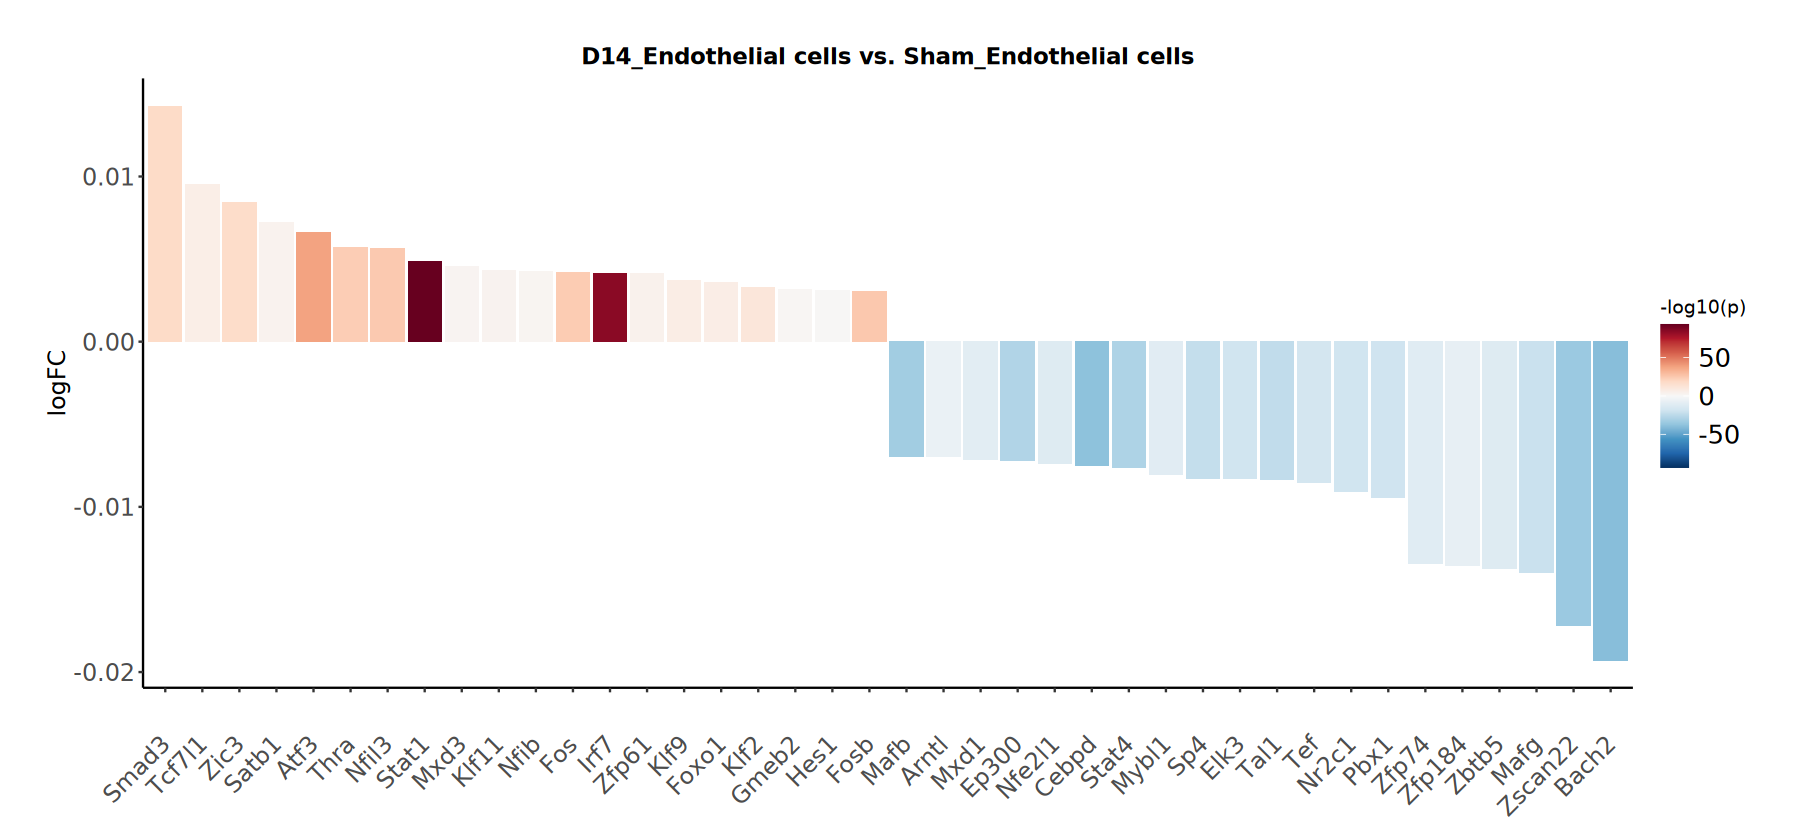

In [29]:
options(repr.plot.width = 15, repr.plot.height = 7) 

# Creating a waterfall plot to compare regulon activity between monocytes and CD8 T cells
WaterfallPlot(
  EC_seurat,
  features = rownames(EC_seurat),  # Using all available TFs in the "TF" assay
  ident.1 = "D14_Endothelial cells",      # First group of cells
  ident.2 = "Sham_Endothelial cells",     # Second group of cells
  exp.transform = FALSE,      # Disable transformation of expression data
  top.n = 20                  # Display the top 20 most differentially active TFs
) + my_theme + my_margin

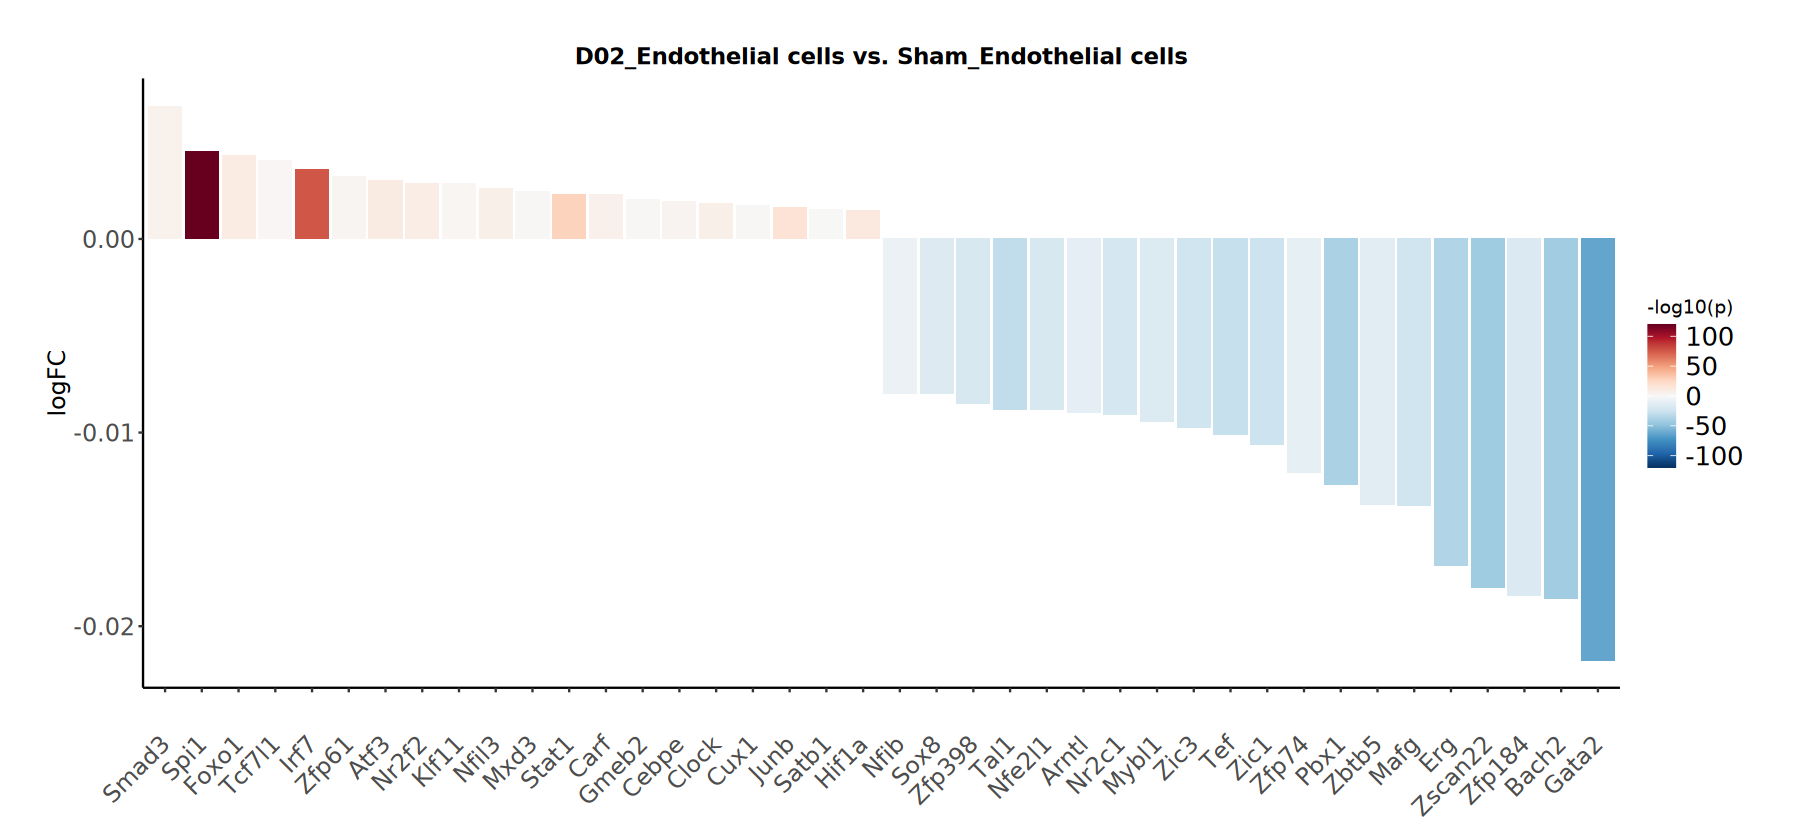

In [30]:
options(repr.plot.width = 15, repr.plot.height = 7) 

# Creating a waterfall plot to compare regulon activity between monocytes and CD8 T cells
WaterfallPlot(
  EC_seurat,
  features = rownames(EC_seurat),  # Using all available TFs in the "TF" assay
  ident.1 = c("D02_Endothelial cells", "D14_Endothelial cells"),      # First group of cells
  ident.2 = "Sham_Endothelial cells",     # Second group of cells
  exp.transform = FALSE,      # Disable transformation of expression data
  top.n = 20                  # Display the top 20 most differentially active TFs
) + my_theme + my_margin

In [31]:
EC_seurat$sham_or_not <- ifelse(EC_seurat$treatment == 'Sham', 'Sham', 'D02_and_D14_stroke')

In [32]:
EC_seurat$sham_or_not %>% table()

.
D02_and_D14_stroke               Sham 
              4101               1779 

In [33]:
EC_seurat$treatment %>% table()

.
 D02  D14 Sham 
2491 1610 1779 

In [34]:
Idents(EC_seurat) <- 'sham_or_not'

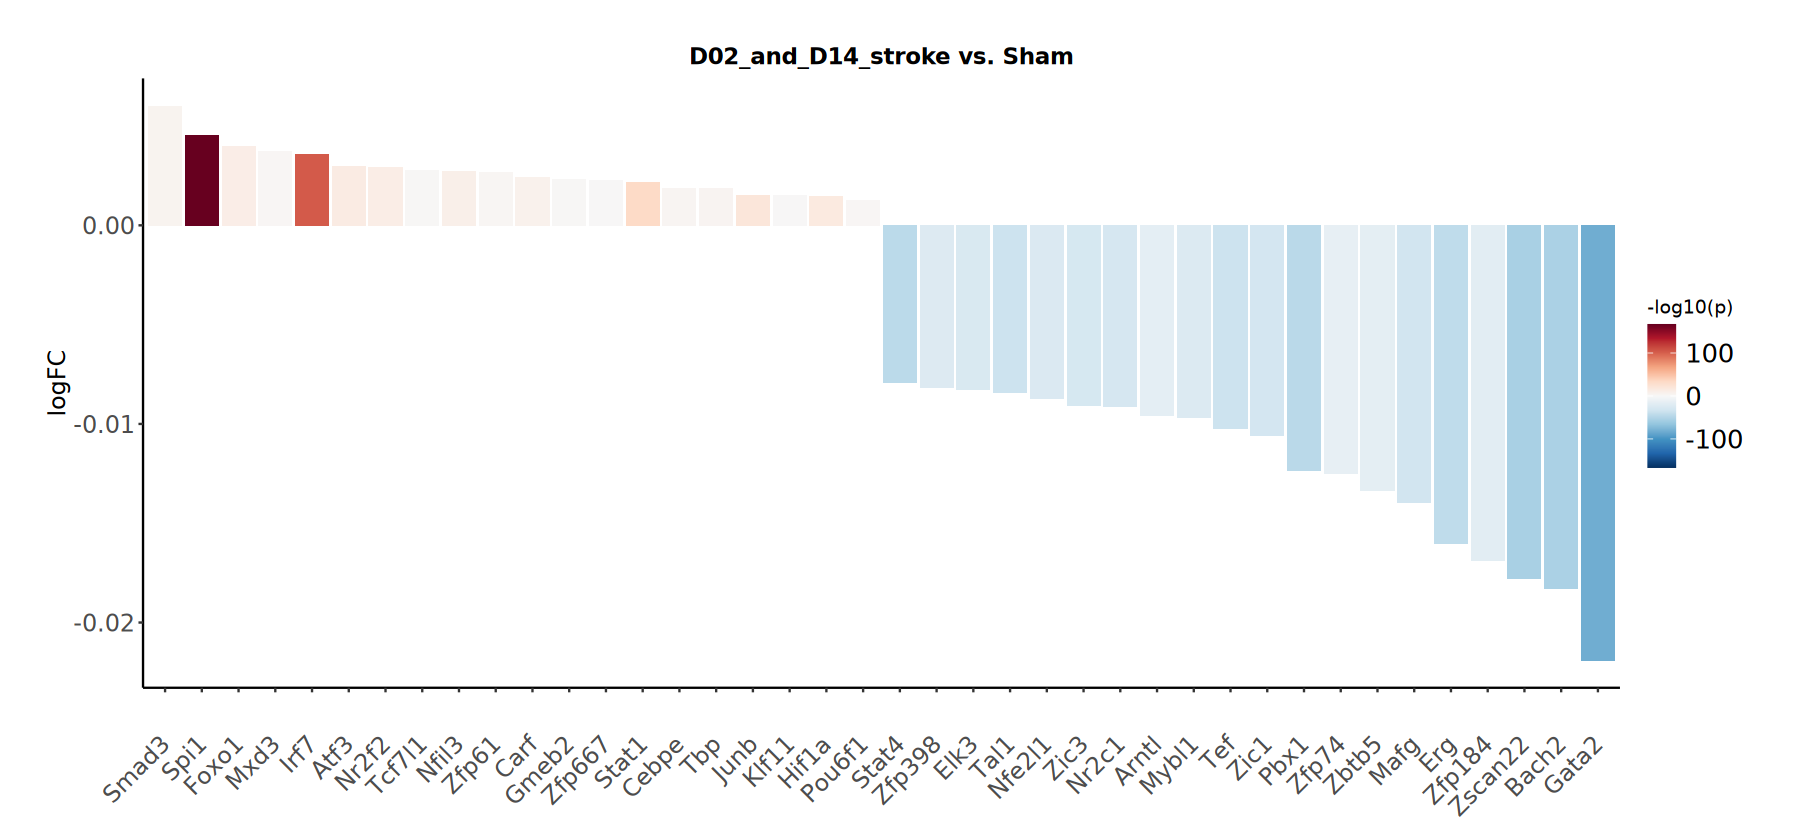

In [35]:
options(repr.plot.width = 15, repr.plot.height = 7) 

# Creating a waterfall plot to compare regulon activity between monocytes and CD8 T cells
WaterfallPlot(
  EC_seurat,
  features = rownames(EC_seurat),  # Using all available TFs in the "TF" assay
  ident.1 = c('D02_and_D14_stroke'),      # First group of cells
  ident.2 = c("Sham"),     # Second group of cells
  exp.transform = FALSE,      # Disable transformation of expression data
  top.n = 20                  # Display the top 20 most differentially active TFs
) + my_theme + my_margin

In [36]:
Idents(EC_seurat) <- 'treatment_and_cell_types'

p1 <- 
# Creating a waterfall plot to compare regulon activity:
WaterfallPlot(
  EC_seurat,
  features = rownames(EC_seurat),  # Using all available TFs in the "TF" assay
  ident.1 = c("D02_Endothelial cells", "D14_Endothelial cells"),      # First group of cells
  ident.2 = "Sham_Endothelial cells",     # Second group of cells
  exp.transform = FALSE,      # Disable transformation of expression data
  top.n = 20                  # Display the top 20 most differentially active TFs
) + my_theme + my_margin

In [37]:
Idents(EC_seurat) <- 'sham_or_not'

p2 <- 
# Creating a waterfall plot to compare regulon activity:
WaterfallPlot(
  EC_seurat,
  features = rownames(EC_seurat),  # Using all available TFs in the "TF" assay
  ident.1 = c('D02_and_D14_stroke'),      # First group of cells
  ident.2 = c("Sham"),     # Second group of cells
  exp.transform = FALSE,      # Disable transformation of expression data
  top.n = 20                  # Display the top 20 most differentially active TFs
) + my_theme + my_margin

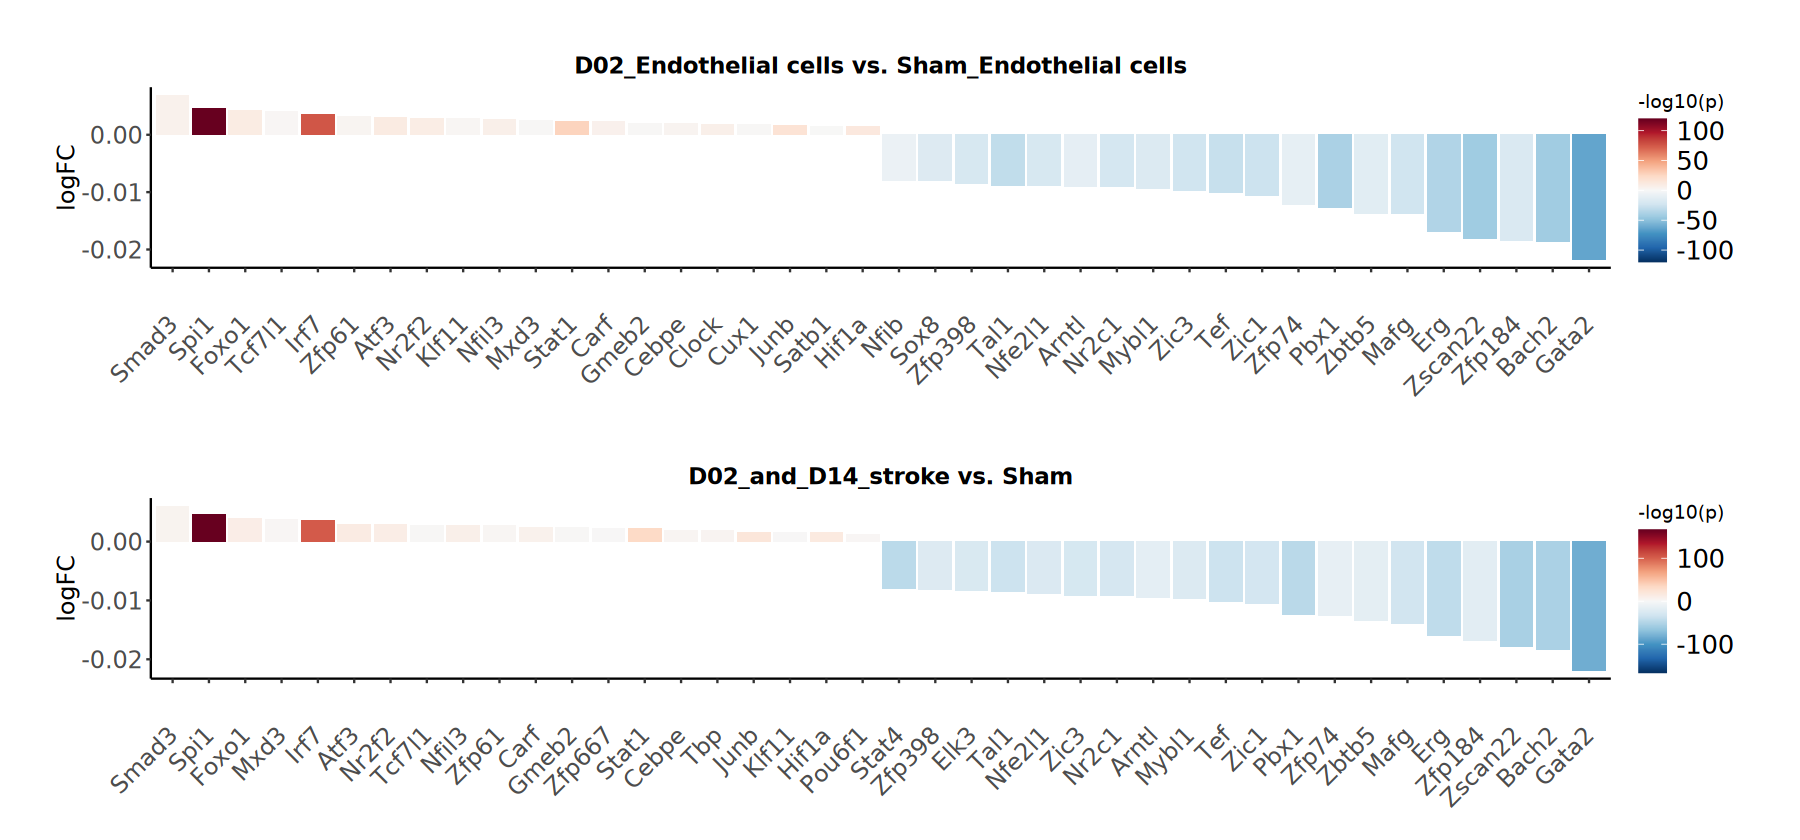

In [38]:
p1 / p2

They are identical therefore Waterfall plot compare one ident against multiple idents like in Seurat.

In [39]:
tf_zscore_EC <- CalcStats(tf_auc_EC, f = GBonilla_seurat$treatment_and_cell_types[is_EC], order = "p", n = 10, t = TRUE)

Using id as id variables



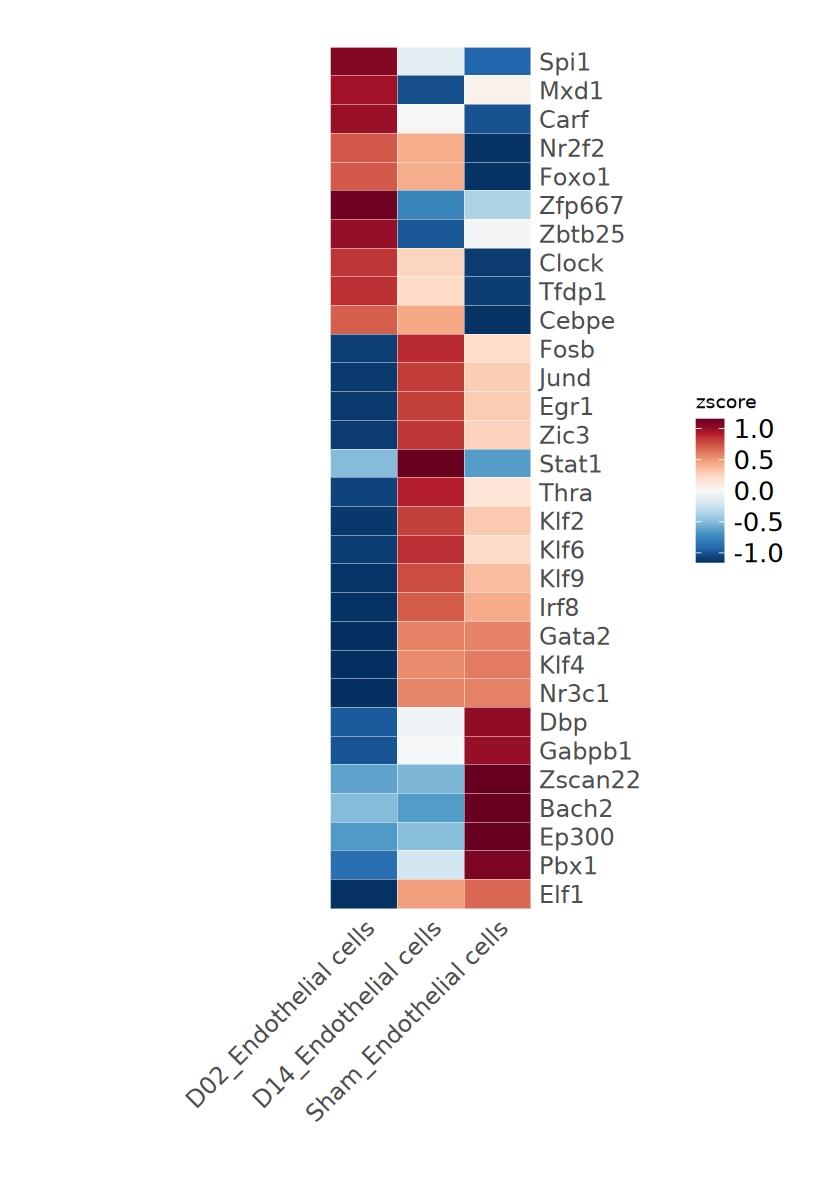

In [40]:
options(repr.plot.width = 7, repr.plot.height = 10) 

Heatmap(tf_zscore_EC, lab_fill = "zscore") + 
 ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 7), "cm")) +
 my_theme

In [41]:
tf_zscore_EC <- CalcStats(tf_auc_EC, f = GBonilla_seurat$treatment_and_cell_types[is_EC], order = "p", n = 20, t = TRUE)

Using id as id variables



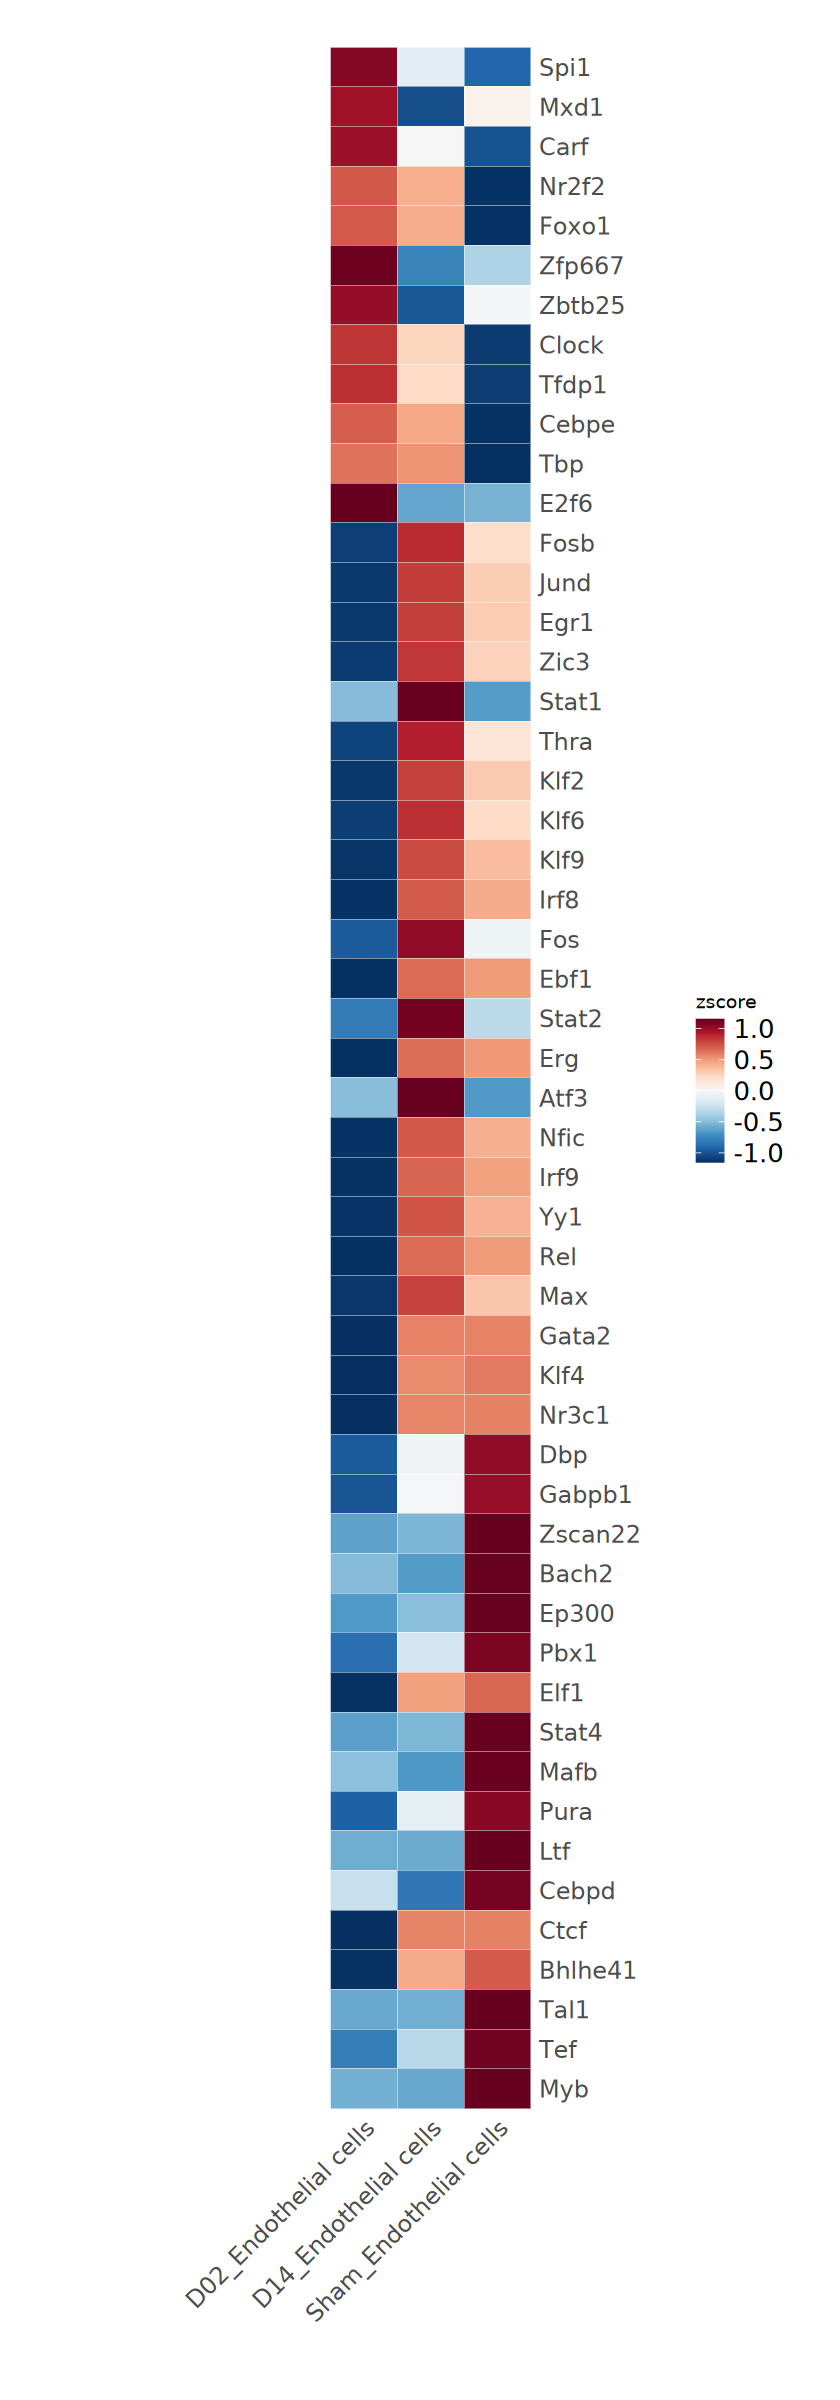

In [42]:
options(repr.plot.width = 7, repr.plot.height = 20) 

Heatmap(tf_zscore_EC, lab_fill = "zscore") + 
 ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 7), "cm")) +
 my_theme

In [43]:
tf_zscore_EC <- CalcStats(tf_auc_EC, f = GBonilla_seurat$treatment_and_cell_types[is_EC], order = "p", n = 50, t = TRUE)

Using id as id variables



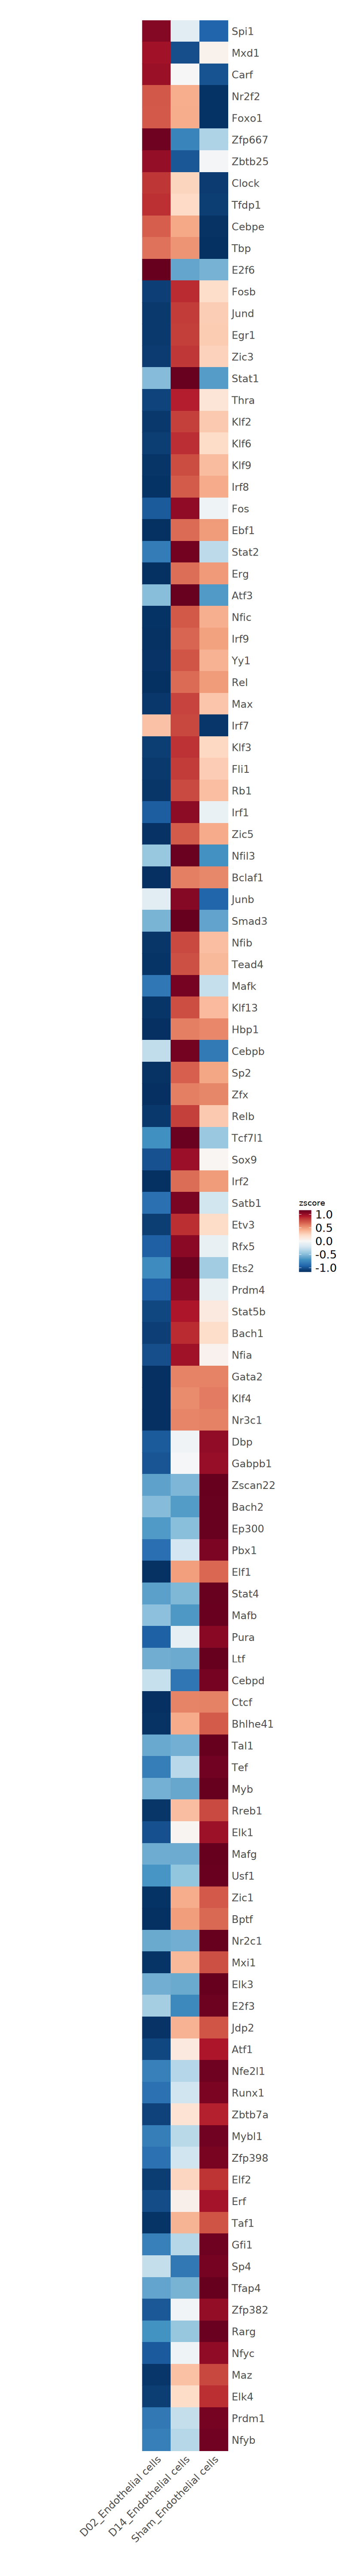

In [44]:
options(repr.plot.width = 7, repr.plot.height = 50) 

Heatmap(tf_zscore_EC, lab_fill = "zscore") + 
 ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 7), "cm")) +
 my_theme

In [55]:
my_gset_lib <- 
    "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/gset/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"

In [56]:
.libPaths(new = my_gset_lib, 
          include.site = FALSE)

In [57]:
.libPaths()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/gset/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [58]:
set.seed(123)   
library(scGSVA)   


Attaching package: 'scGSVA'


The following object is masked from 'package:mosaic':

    dotPlot


The following objects are masked from 'package:SeuratExtend':

    Heatmap, pbmc




In [69]:
mmuko <- buildAnnot(species="mouse",keytype="SYMBOL",anntype="KEGG")

'select()' returned 1:many mapping between keys and columns



In [70]:
ls()

[1] "EC_seurat"                          "GBonilla_seurat"                   
 [3] "all_packages"                       "hsko"                              
 [5] "is_EC"                              "mmuko"                             
 [7] "my_gset_lib"                        "my_margin"                         
 [9] "my_seurat_extend_with_domc_package" "my_theme"                          
[11] "p1"                                 "p2"                                
[13] "pbmcs"                              "res"                               
[15] "tf_auc"                             "tf_auc_EC"                         
[17] "tf_zscore_EC"

In [71]:
EC_seurat %>% levels()

[1] "Sham"               "D02_and_D14_stroke"

In [72]:
Idents(EC_seurat) <- 'treatment'

In [73]:
EC_seurat

An object of class Seurat 
14539 features across 5880 samples within 2 assays 
Active assay: TF (223 features, 0 variable features)
 1 layer present: data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap

In [74]:
DefaultAssay(EC_seurat) <- 'RNA'

In [75]:
EC_seurat

An object of class Seurat 
14539 features across 5880 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

In [77]:
res_EC <- scgsva(EC_seurat, mmuko, method="ssgsea", cores = 16) ## or use UCell

i GSVA version 2.0.1

! 1963 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 222 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1617 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 222 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1711 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 222 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 2114 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 222 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1747 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 222 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1976 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 222 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished



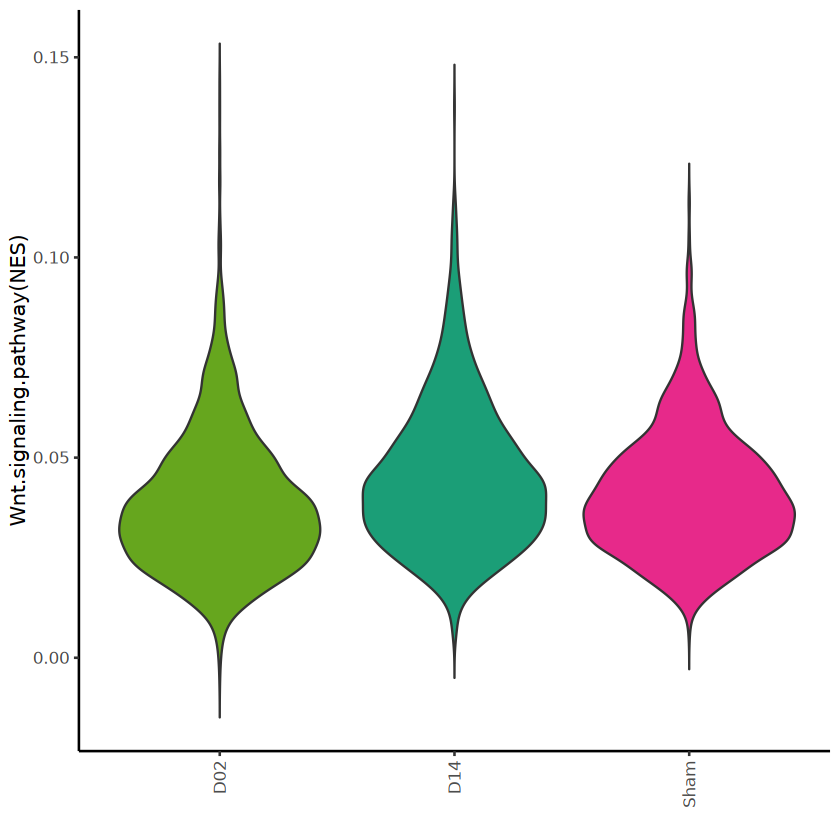

In [78]:
options(repr.plot.width = 7, repr.plot.height = 7) 

vlnPlot(res_EC, features="Wnt.signaling.pathway", group_by= "treatment") ## split.plot = TRUE and split.by

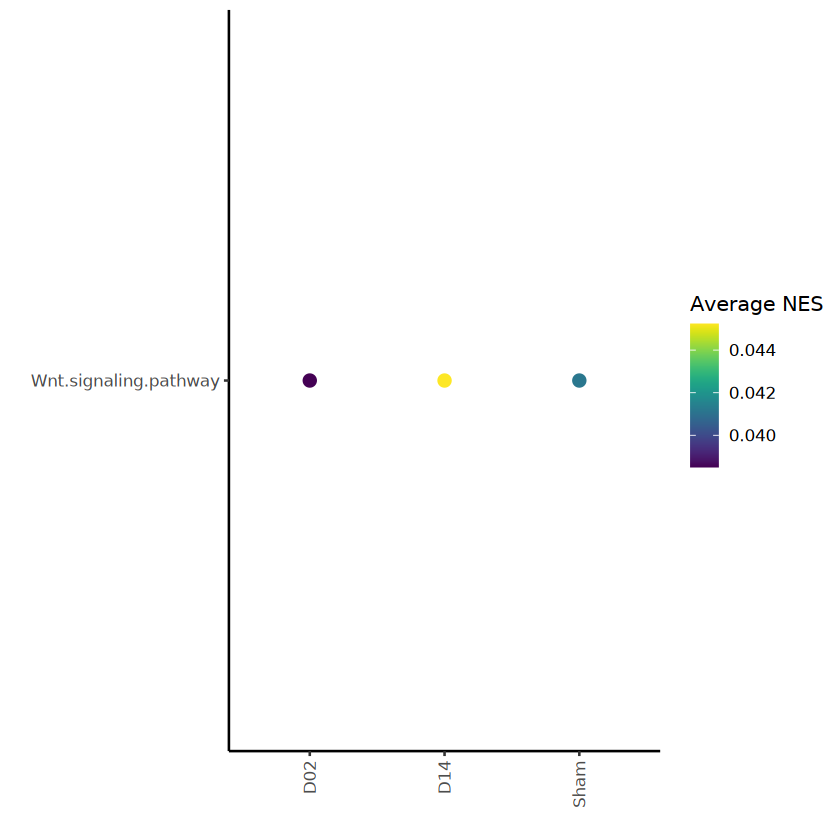

In [79]:
dotPlot(res_EC, features="Wnt.signaling.pathway", group_by="treatment")

Picking joint bandwidth of 0.00318



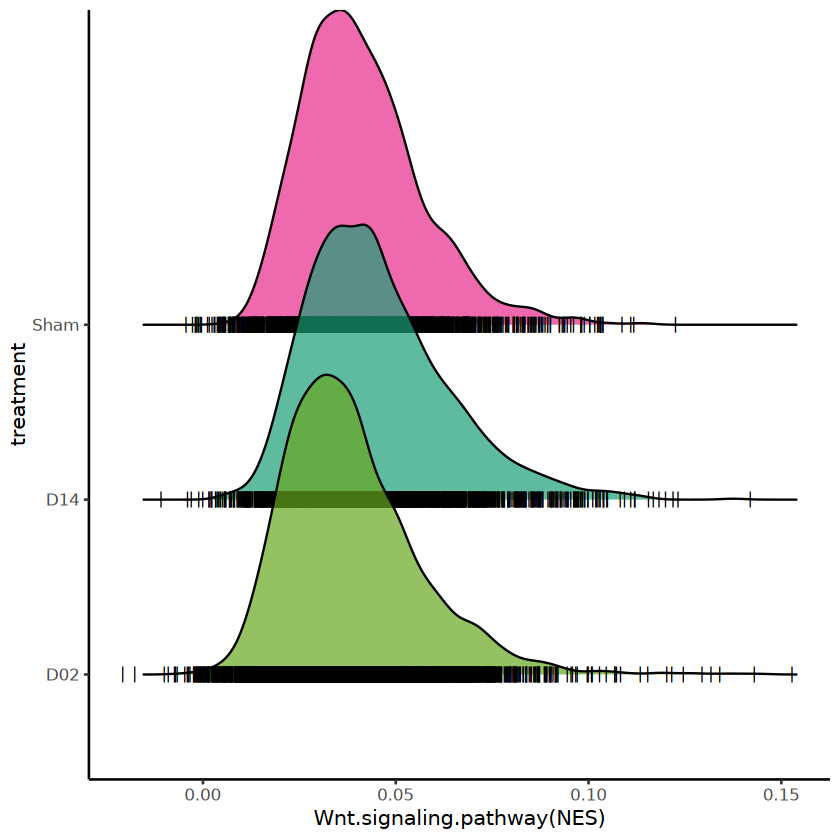

In [80]:
ridgePlot(res_EC, features = "Wnt.signaling.pathway", group_by = "treatment")

In [81]:
EC_seurat

An object of class Seurat 
14539 features across 5880 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

In [85]:
my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

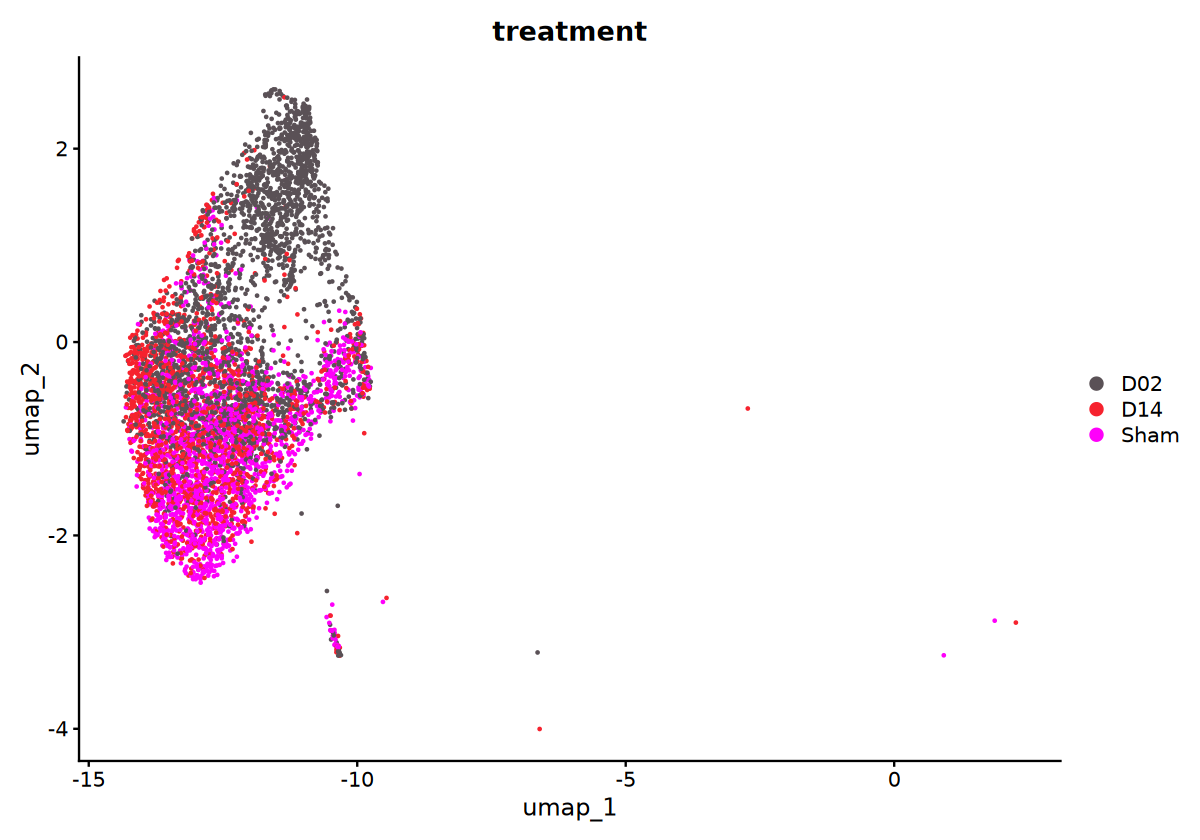

In [87]:
options(repr.plot.width = 10, repr.plot.height = 7)

DimPlot(object = EC_seurat, reduction = 'umap', group.by = 'treatment', shuffle = TRUE, cols = my_colours)

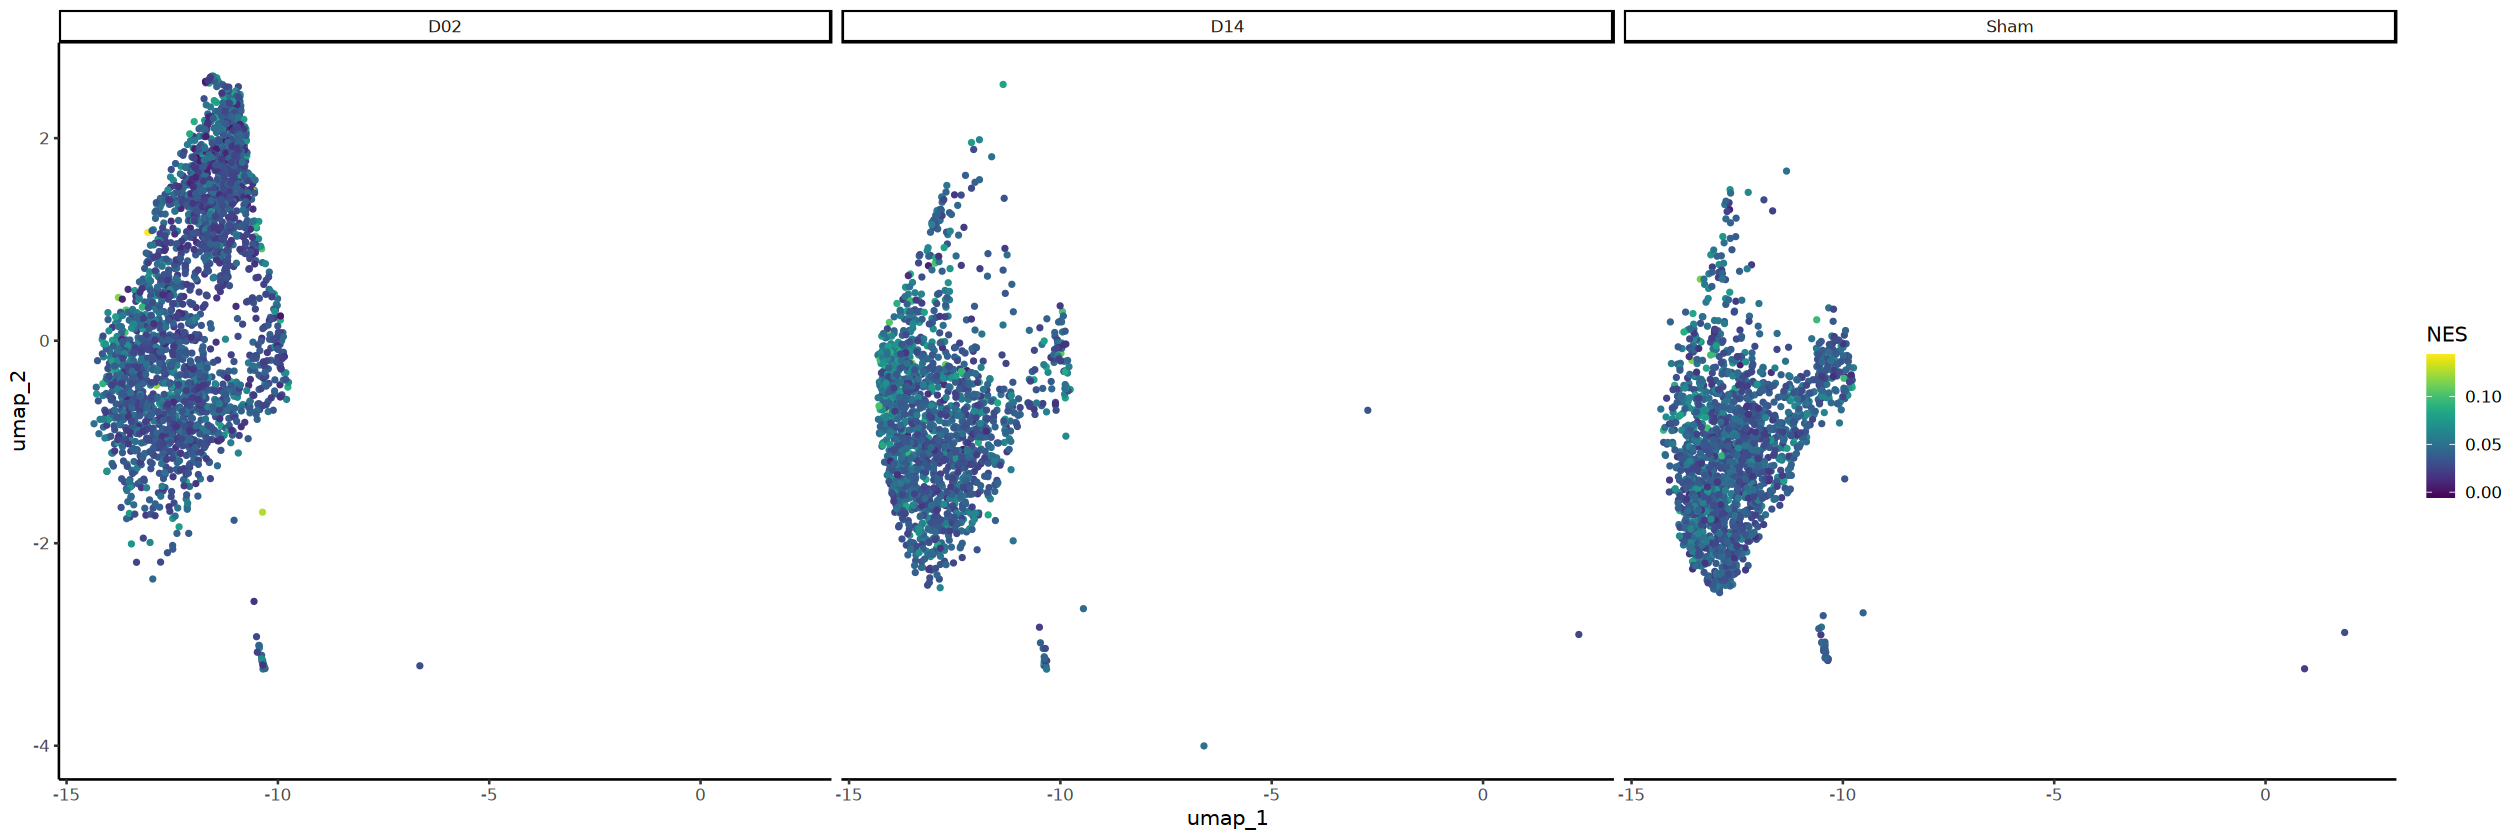

In [88]:
options(repr.plot.width = 21, repr.plot.height = 7) 

featurePlot(res_EC, features = "Wnt.signaling.pathway", group_by = "treatment", reduction="umap")

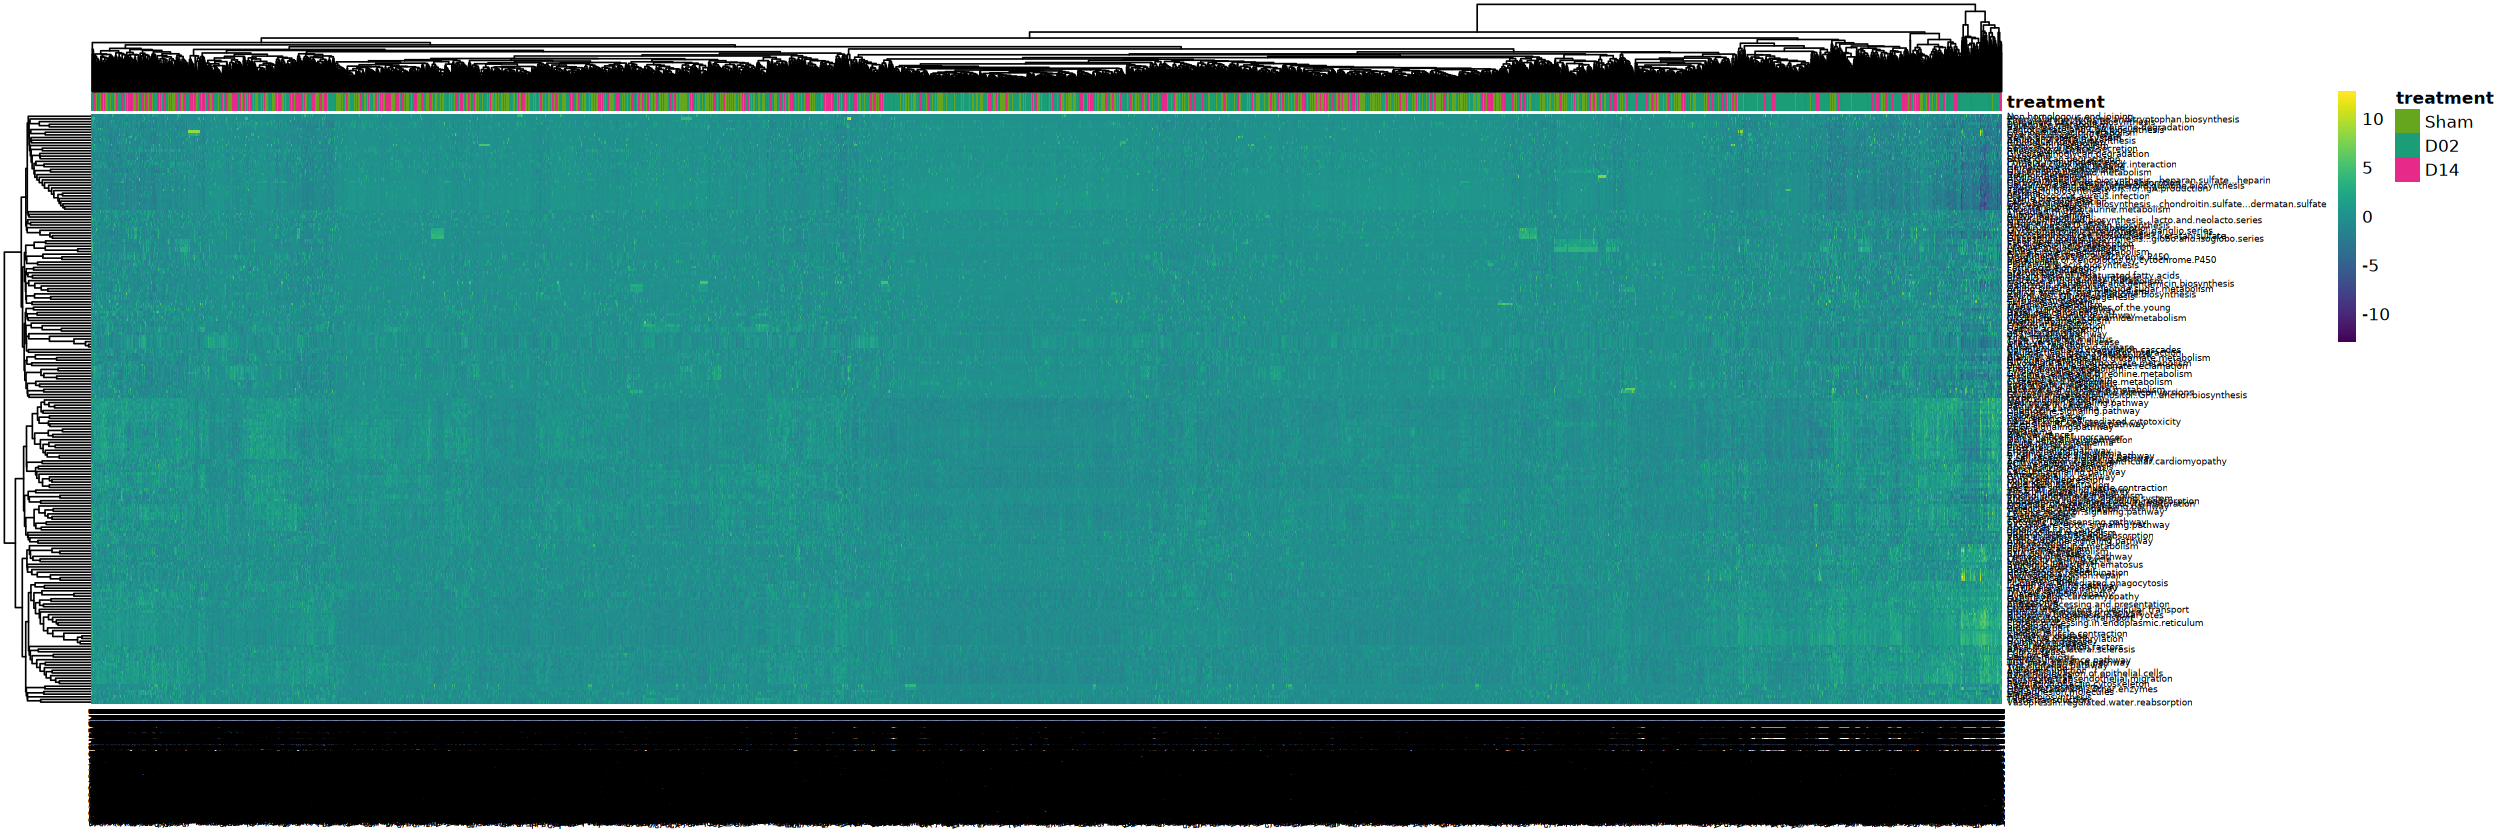

In [89]:
Heatmap(res_EC, group_by = "treatment")

In [90]:
## Find significant pathways across groups
findPathway(res_EC, group = "treatment")
sigPathway(res_EC, group = "treatment")

logFC         AveExpr      t             P.Value       adj.P.Val    
1    0.154675744   0.124801394  30.75796     9.018767e-193 2.002166e-190
2    0.041476047   0.174425264  29.55752     3.855638e-179 4.279758e-177
3    0.052369262   0.022332492  28.46710     4.157441e-167 3.076506e-165
4    0.027254371   0.145522359  27.71645     5.050121e-159 2.802817e-157
5    0.034210162   0.087687052  27.04514     6.205964e-152 2.755448e-150
6    0.038310747   0.112305817  25.06122     8.799507e-132 3.255818e-130
7    0.065065924  -0.070598790  24.86268     7.829057e-130 2.482930e-128
8    0.004380383   0.103250210  24.33466     1.039085e-124 2.883462e-123
9    0.019905916   0.025212560  22.22522     3.776806e-105 9.316122e-104
10   0.046573363  -0.158224540  19.54866      1.680232e-82  3.730115e-81
11  -0.008961913   0.154585152 -19.27537      2.490596e-80  5.026475e-79
12  -0.008296629   0.142650419 -17.69200      2.770767e-68  5.125919e-67
13   0.009603324   0.074188430  17.44560      1.716253e-66  2.930833e-65
14  -0.009277281   0.144071902 -16.98216      3.500281e-63  5.550445e-62
15  -0.005283582   0.006415915 -16.92218      9.259074e-63  1.370343e-61
16  -0.012602738   0.508359258 -16.80456      6.180915e-62  8.576020e-61
17   0.020525070  -0.037122693  16.26552      3.187177e-58  4.162078e-57
18   0.008676527  -0.097047099  15.66100      3.434733e-54  4.236171e-53
19  -0.010356474   0.301094247 -15.34191      4.057177e-52  4.740491e-51
20  -0.011501747   0.345432137 -15.22466      2.290462e-51  2.542413e-50
21  -0.008568666   0.081366071 -15.06360      2.420430e-50  2.558740e-49
22   0.009592159   0.007921352  14.84497      5.725676e-49  5.777728e-48
23   0.012313603  -0.079773356  14.79348      1.198661e-48  1.156969e-47
24  -0.008131876   0.171836360 -13.93155      1.984389e-43  1.835560e-42
25  -0.006263023   0.189423728 -13.66518      7.109286e-42  6.313046e-41
26  -0.012738808   0.241575660 -13.63789      1.022086e-41  8.727042e-41
27   0.021332561  -0.233056477  13.61065      1.467466e-41  1.206583e-40
28   0.010369258   0.114878904  13.56757      2.596700e-41  2.058812e-40
29  -0.012951937   0.538110356 -13.54505      3.496592e-41  2.676702e-40
30  -0.005581047   0.034924357 -13.48727      7.488863e-41  5.541759e-40
... ...           ...          ...           ...           ...          
415  9.944492e-04  0.129546527  1.2725215619 0.2032382     0.2337766    
416  8.332363e-04  0.146983588  1.1453252051 0.2521211     0.2885097    
417  5.570632e-04  0.064236773  1.1131067046 0.2657081     0.3024985    
418  5.080333e-04  0.010816136  1.0878353227 0.2767124     0.3134191    
419 -7.992291e-04  0.174059010 -1.0816987497 0.2794308     0.3148915    
420 -6.174990e-04 -0.017022403 -1.0136535610 0.3107898     0.3484613    
421 -6.040798e-04  0.078012006 -0.9936829936 0.3204181     0.3559543    
422 -5.838501e-04  0.092324711 -0.9931463119 0.3206795     0.3559543    
423  5.745209e-04 -0.097047099  0.9358011950 0.3494140     0.3859199    
424  9.558674e-04 -0.176232794  0.8787147846 0.3795918     0.4171752    
425 -1.086280e-03 -0.054801299 -0.8719432915 0.3832749     0.4174877    
426 -3.946257e-04  0.057151800 -0.8712790475 0.3836374     0.4174877    
427 -5.275691e-04  0.031539969 -0.7164227975 0.4737588     0.5130461    
428 -2.789187e-04 -0.026027448 -0.6305918308 0.5283319     0.5693674    
429 -7.188632e-04 -0.074167593 -0.6171430328 0.5371643     0.5760892    
430  2.794534e-04  0.054059103  0.5420555771 0.5878008     0.6273643    
431 -3.730739e-04 -0.033216463 -0.5071333094 0.6120803     0.6501523    
432 -3.123223e-04  0.000855723 -0.4953287310 0.6203866     0.6558373    
433  4.037163e-04 -0.110893703  0.4728023710 0.6363717     0.6695475    
434 -2.790033e-04 -0.013191375 -0.3364808266 0.7365203     0.7712618    
435  2.674538e-04 -0.127122077  0.2854109351 0.7753394     0.8081002    
436  1.408859e-04  0.017423574  0.2409372011 0.8096122     0.8398781    
437 -4.628090e-04 -0.169019197 -0.2180315345 0.8274121     0.8

Path                                        group1 group2 statistic
1   ABC.transporters                            D02    D14    1888322  
2   ABC.transporters                            D02    Sham   1589823  
3   ABC.transporters                            D14    Sham   1107796  
4   Acute.myeloid.leukemia                      D02    D14    1900538  
5   Acute.myeloid.leukemia                      D02    Sham   2054863  
6   Acute.myeloid.leukemia                      D14    Sham   1409414  
7   Adherens.junction                           D02    D14    1593902  
8   Adherens.junction                           D02    Sham   2020404  
9   Adherens.junction                           D14    Sham   1618605  
10  Adipocytokine.signaling.pathway             D02    D14    2081683  
11  Adipocytokine.signaling.pathway             D02    Sham   2208800  
12  Adipocytokine.signaling.pathway             D14    Sham   1370363  
13  African.trypanosomiasis                     D02    D14    1954482  
14  African.trypanosomiasis                     D02    Sham   1963318  
15  African.trypanosomiasis                     D14    Sham   1310472  
16  Alanine..aspartate.and.glutamate.metabolism D02    D14    2234224  
17  Alanine..aspartate.and.glutamate.metabolism D02    Sham   2111550  
18  Alanine..aspartate.and.glutamate.metabolism D14    Sham   1181476  
19  Aldosterone.regulated.sodium.reabsorption   D02    D14    1981386  
20  Aldosterone.regulated.sodium.reabsorption   D02    Sham   2045805  
21  Aldosterone.regulated.sodium.reabsorption   D14    Sham   1344436  
22  Allograft.rejection                         D02    D14    1416681  
23  Allograft.rejection                         D02    Sham   1879146  
24  Allograft.rejection                         D14    Sham   1667259  
25  Alzheimer.disease                           D02    D14    2595826  
26  Alzheimer.disease                           D02    Sham   3220819  
27  Alzheimer.disease                           D14    Sham   1693235  
28  Amino.sugar.and.nucleotide.sugar.metabolism D02    D14    2134736  
29  Amino.sugar.and.nucleotide.sugar.metabolism D02    Sham   2145242  
30  Amino.sugar.and.nucleotide.sugar.metabolism D14    Sham   1287006  
... ...                                         ...    ...    ...      
637 Vasopressin.regulated.water.reabsorption    D02    D14    2153582  
638 Vasopressin.regulated.water.reabsorption    D02    Sham   2505597  
639 Vasopressin.regulated.water.reabsorption    D14    Sham   1506702  
640 Viral.myocarditis                           D02    D14    1657050  
641 Viral.myocarditis                           D02    Sham   2069407  
642 Viral.myocarditis                           D14    Sham   1604077  
643 Vitamin.B6.metabolism                       D02    D14    1898906  
644 Vitamin.B6.metabolism                       D02    Sham   1686679  
645 Vitamin.B6.metabolism                       D14    Sham   1177028  
646 Vitamin.digestion.and.absorption            D02    D14    1926938  
647 Vitamin.digestion.and.absorption            D02    Sham   1997710  
648 Vitamin.digestion.and.absorption            D14    Sham   1352517  
649 Wnt.signaling.pathway                       D02    D14    1542967  
650 Wnt.signaling.pathway                       D02    Sham   1948703  
651 Wnt.signaling.pathway                       D14    Sham   1610608  
652 alpha.Linolenic.acid.metabolism             D02    D14    2155046  
653 alpha.Linolenic.acid.metabolism             D02    Sham   1941851  
654 alpha.Linolenic.acid.metabolism             D14    Sham   1139426  
655 beta.Alanine.metabolism                     D02    D14    2106752  
656 beta.Alanine.metabolism                     D02    Sham   2003984  
657 beta.Alanine.metabolism                     D14    Sham   1219762  
658 mRNA.surveillance.pathway                   D02    D14    1847436  
659 mRNA.surveillance.pathway                   D02    Sham   2318726  
660 mRNA.surveillance.pathway               

In [92]:
## Extract specific pathways with expression value
genes(res_EC, features = "ABC.transporters") %>% head()

GeneID PATH  Annot            BRS02R1CACAGCCGGTTC BRS02R1TCTCCGGGCTCG
5    Abca1  02010 ABC transporters 0                   0                  
8    Abca2  02010 ABC transporters 0                   0                  
10   Abcb7  02010 ABC transporters 0                   0                  
11   Abcg1  02010 ABC transporters 0                   0                  
446  Abcd1  02010 ABC transporters 0                   0                  
7166 Abcc1  02010 ABC transporters 0                   0                  
     BRS02R1GCCTTCTCTGAC BRS02R1GACTACGTTTTT BRS02R1TAGGCGAGGATT
5    0                   0                   0                  
8    0                   0                   0                  
10   0                   0                   0                  
11   0                   0                   0                  
446  0                   0                   0                  
7166 1                   0                   0                  
     BRS02R1ATCAATCGTGTA BRS02R1CATTCTGCTGAT ... BRD14R4TGGGTATACTGT
5    0                   0                   ... 0                  
8    0                   0                   ... 0                  
10   0                   0                   ... 0                  
11   0                   0                   ... 0                  
446  0                   0                   ... 0                  
7166 0                   0                   ... 0                  
     BRD14R4TACCTATGTGGC BRD14R4CAACCCATGAGT BRD14R4CCTCCCGGACAC
5    0                   0                   0                  
8    0                   0                   0                  
10   0                   0                   0                  
11   0                   0                   0                  
446  0                   0                   0                  
7166 0                   0                   0                  
     BRD14R4TAATGCCCTCCT BRD14R4CGCGACCCGACT BRD14R4CCTATCAAATAC
5    0                   0                   0                  
8    0                   0                   0                  
10   0                   0                   0                  
11   0                   0                   0                  
446  0                   0                   0                  
7166 0                   0                   0                  
     BRD14R4GTTCCGGATATC BRD14R4TATAACACGGAA BRD14R4GCCCGAACGTCT
5    0                   0                   0                  
8    0                   0                   0                  
10   0                   0                   0                  
11   0                   0                   0                  
446  0                   0                   0                  
7166 0                   0                   0

In [93]:
significant_kegg_pathways <- sigPathway(res_EC, group = "treatment")

In [94]:
significant_kegg_pathways %>% dim()

[1] 666   6

In [95]:
significant_kegg_pathways %>% head()

Path                   group1 group2 statistic p        p.adj       
1 ABC.transporters       D02    D14    1888322   2.00e-03 3.013575e-03
2 ABC.transporters       D02    Sham   1589823   5.82e-56 1.685270e-54
3 ABC.transporters       D14    Sham   1107796   4.14e-30 3.063600e-29
4 Acute.myeloid.leukemia D02    D14    1900538   5.00e-03 7.254902e-03
5 Acute.myeloid.leukemia D02    Sham   2054863   5.10e-05 8.962005e-05
6 Acute.myeloid.leukemia D14    Sham   1409414   4.25e-01 4.709651e-01

In [96]:
significant_kegg_pathways %>% summary()

     Path              group1             group2            statistic      
 Length:666         Length:666         Length:666         Min.   :1012010  
 Class :character   Class :character   Class :character   1st Qu.:1510532  
 Mode  :character   Mode  :character   Mode  :character   Median :1876851  
                                                          Mean   :1833275  
                                                          3rd Qu.:2100457  
                                                          Max.   :3294443  
       p                 p.adj          
 Min.   :0.0000000   Min.   :0.0000000  
 1st Qu.:0.0000000   1st Qu.:0.0000000  
 Median :0.0000004   Median :0.0000008  
 Mean   :0.0934119   Mean   :0.1007133  
 3rd Qu.:0.0200000   3rd Qu.:0.0266400  
 Max.   :0.9970000   Max.   :0.9970000  

In [97]:
significant_kegg_pathways %>% arrange(p.adj) %>% head(20)

Path                                         group1 group2 statistic
1  Oxidative.phosphorylation                    D02    Sham   3294443  
2  Ribosome                                     D02    Sham   3292281  
3  Parkinson.disease                            D02    Sham   3264276  
4  Metabolic.pathways                           D02    D14    2954633  
5  Alzheimer.disease                            D02    Sham   3220819  
6  Huntington.disease                           D02    Sham   3214245  
7  Metabolic.pathways                           D02    Sham   3148491  
8  Proteasome                                   D02    Sham   3119012  
9  Cardiac.muscle.contraction                   D02    Sham   3097367  
10 Protein.processing.in.endoplasmic.reticulum  D02    Sham   3014274  
11 Rheumatoid.arthritis                         D02    Sham   1476087  
12 Rheumatoid.arthritis                         D02    D14    1331777  
13 Antigen.processing.and.presentation          D14    Sham   1947255  
14 Oxidative.phosphorylation                    D02    D14    2656019  
15 Protein.export                               D02    Sham   2900904  
16 Intestinal.immune.network.for.IgA.production D02    Sham   1562248  
17 Cytokine.cytokine.receptor.interaction       D02    Sham   1580736  
18 Alzheimer.disease                            D02    D14    2595826  
19 Allograft.rejection                          D02    D14    1416681  
20 Phagosome                                    D02    Sham   2847157  
   p         p.adj        
1  1.86e-162 1.238760e-159
2  8.17e-162 2.720610e-159
3  1.31e-153 2.908200e-151
4  5.35e-145 8.907750e-143
5  2.64e-141 3.516480e-139
6  1.73e-139 1.920300e-137
7  5.63e-122 5.356543e-120
8  1.64e-114 1.365300e-112
9  3.51e-109 2.597400e-107
10  6.44e-90  4.289040e-88
11  2.04e-77  1.235127e-75
12  6.27e-74  3.479850e-72
13  2.63e-73  1.347369e-71
14  3.77e-69  1.793443e-67
15  1.08e-66  4.795200e-65
16  7.74e-61  3.221775e-59
17  1.52e-57  5.954824e-56
18  2.84e-57  1.050800e-55
19  6.73e-57  2.241090e-55
20  6.46e-57  2.241090e-55

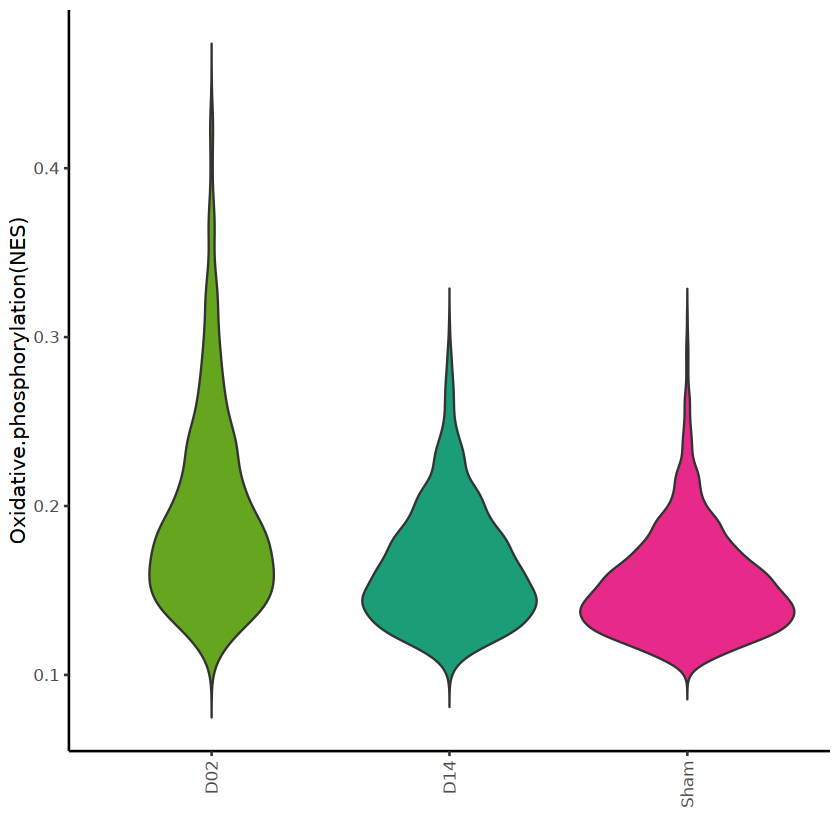

In [98]:
options(repr.plot.width = 7, repr.plot.height = 7) 

vlnPlot(res_EC, features="Oxidative.phosphorylation", group_by= "treatment") ## split.plot = TRUE and split.by

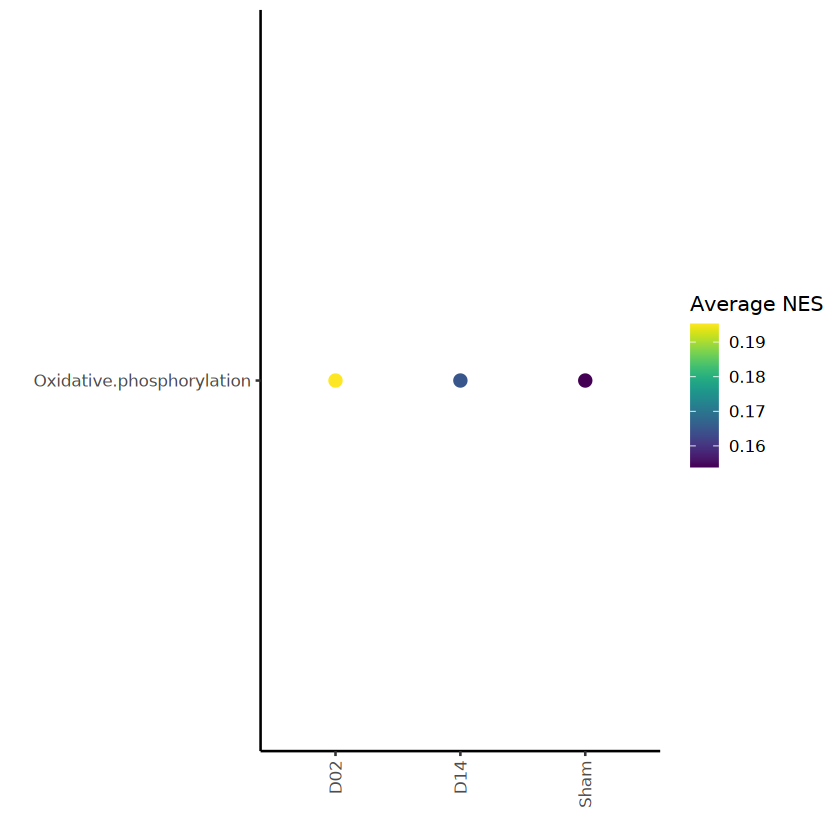

In [99]:
dotPlot(res_EC, features="Oxidative.phosphorylation", group_by="treatment")

Picking joint bandwidth of 0.00745



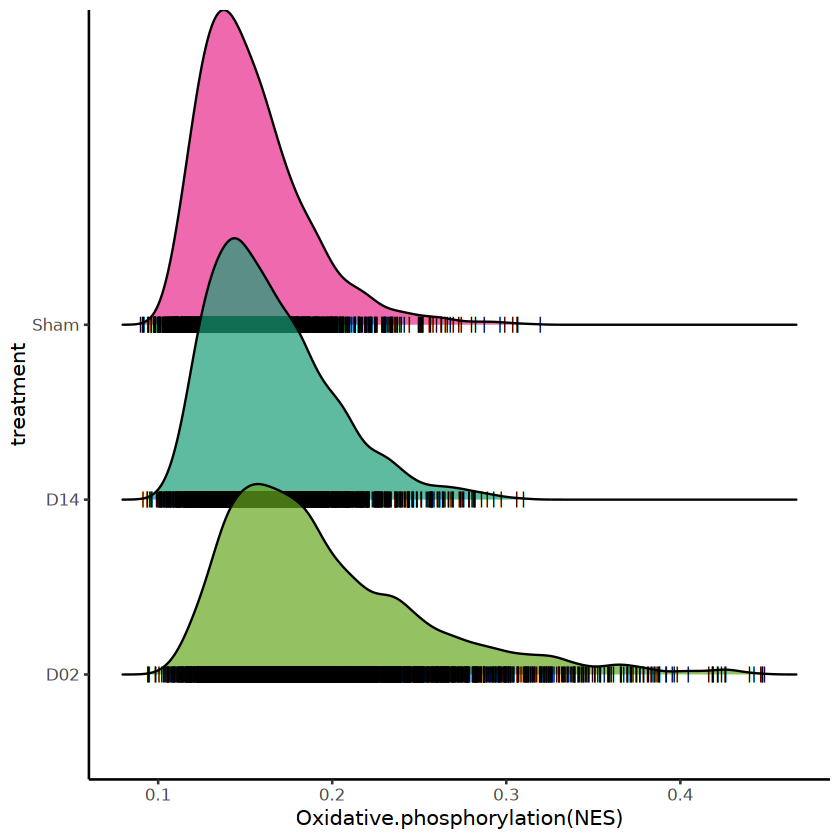

In [100]:
ridgePlot(res_EC, features = "Oxidative.phosphorylation", group_by = "treatment")

Picking joint bandwidth of 0.000916



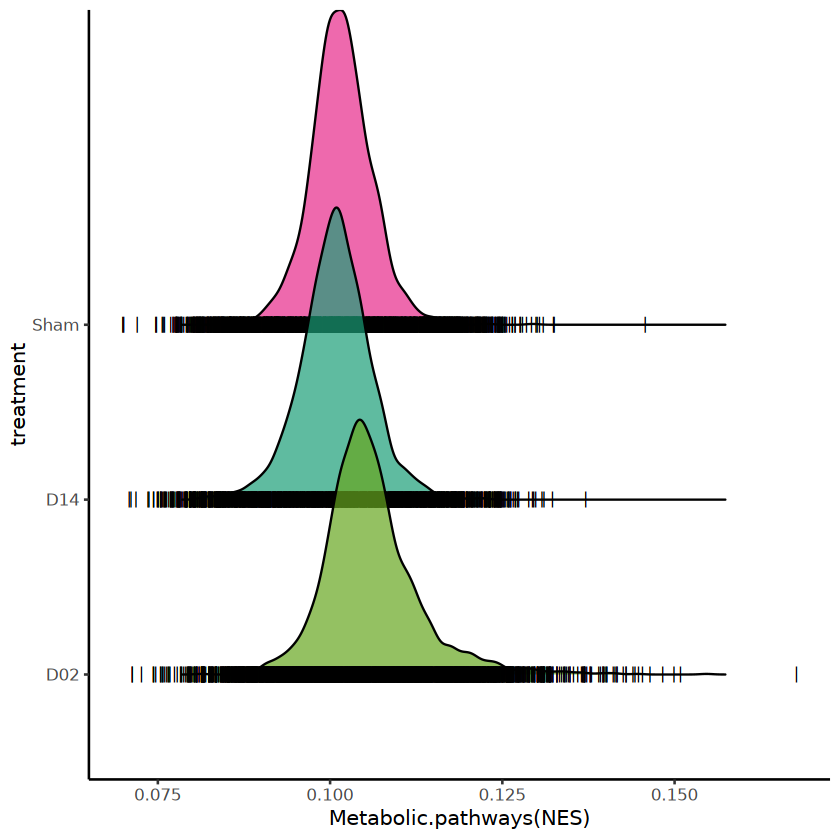

In [101]:
ridgePlot(res_EC, features = "Metabolic.pathways", group_by = "treatment")

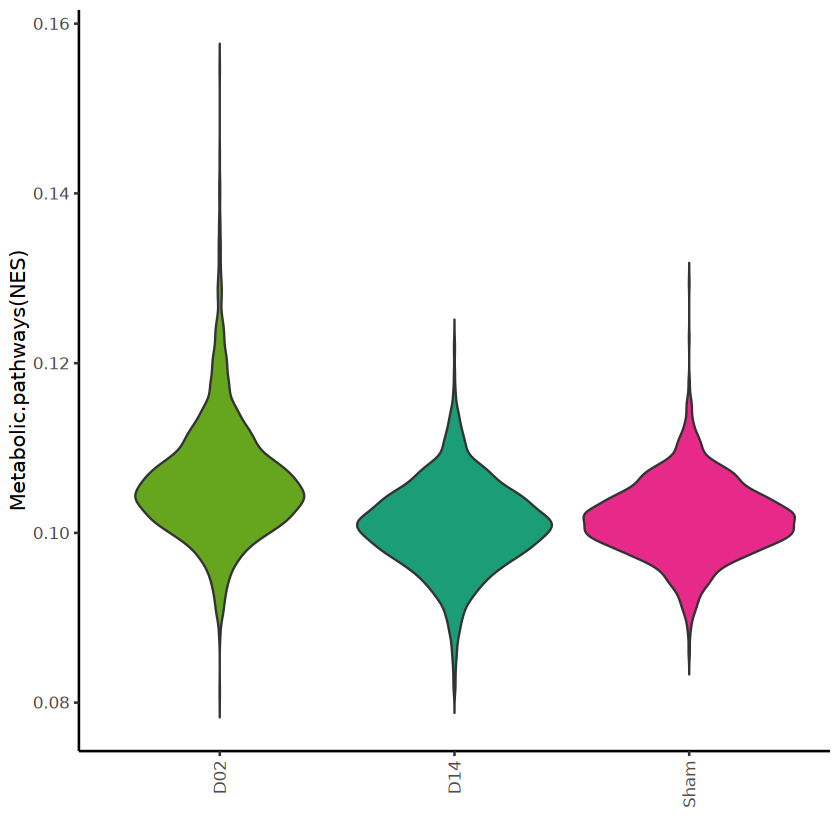

In [102]:
options(repr.plot.width = 7, repr.plot.height = 7) 

vlnPlot(res_EC, features="Metabolic.pathways", group_by= "treatment") ## split.plot = TRUE and split.by

In [103]:
significant_kegg_pathways$Path %>% grep(pattern = 'endothe', ignore.case = T, value = T)

[1] "Leukocyte.transendothelial.migration"
[2] "Leukocyte.transendothelial.migration"
[3] "Leukocyte.transendothelial.migration"

In [104]:
significant_kegg_pathways$Path %>% grep(pattern = 'hypox', ignore.case = T, value = T)

character(0)

In [105]:
significant_kegg_pathways$Path %>% grep(pattern = 'gluco', ignore.case = T, value = T)

[1] "Glycolysis...Gluconeogenesis" "Glycolysis...Gluconeogenesis"
[3] "Glycolysis...Gluconeogenesis"

In [106]:
significant_kegg_pathways$Path %>% grep(pattern = 'ischem', ignore.case = T, value = T)

character(0)

Picking joint bandwidth of 0.00497



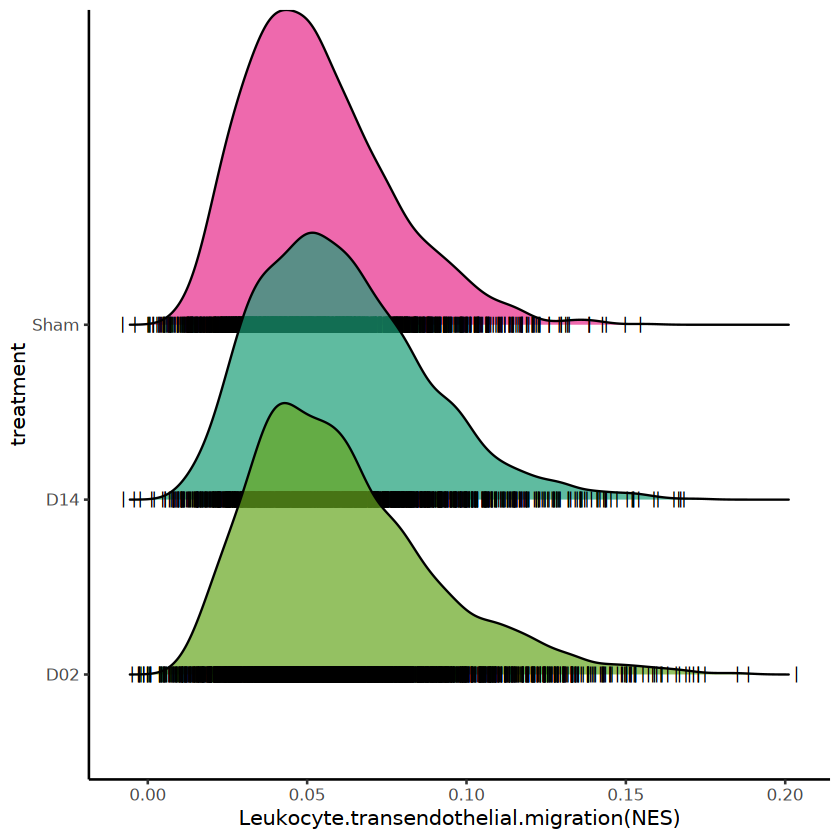

In [107]:
ridgePlot(res_EC, features = "Leukocyte.transendothelial.migration", group_by = "treatment")

Picking joint bandwidth of 0.00332



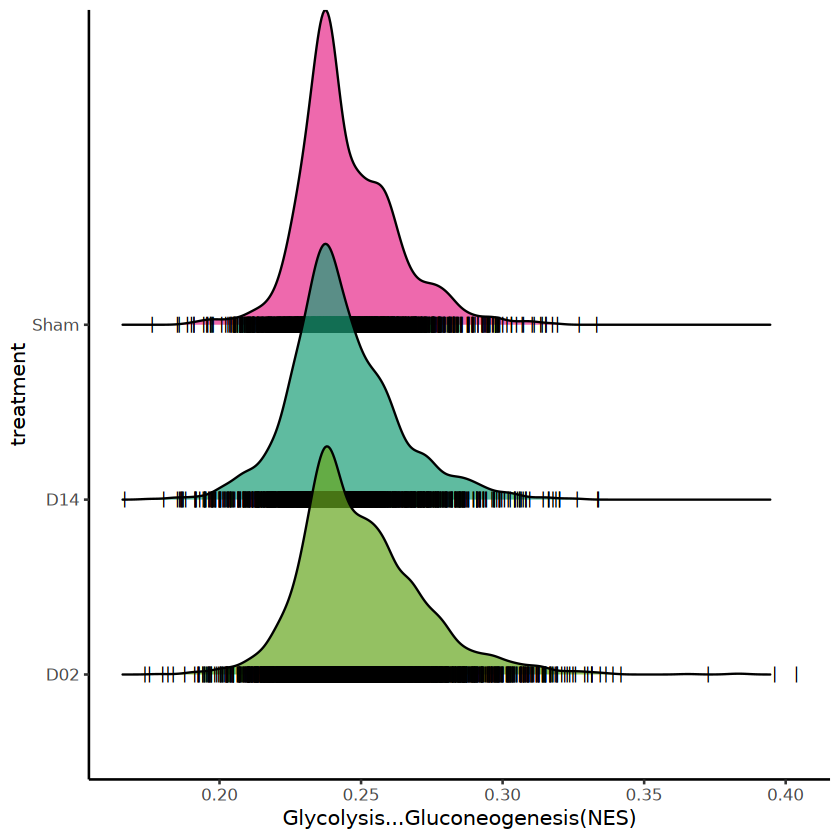

In [108]:
ridgePlot(res_EC, features = "Glycolysis...Gluconeogenesis", group_by = "treatment")

Picking joint bandwidth of 0.0308



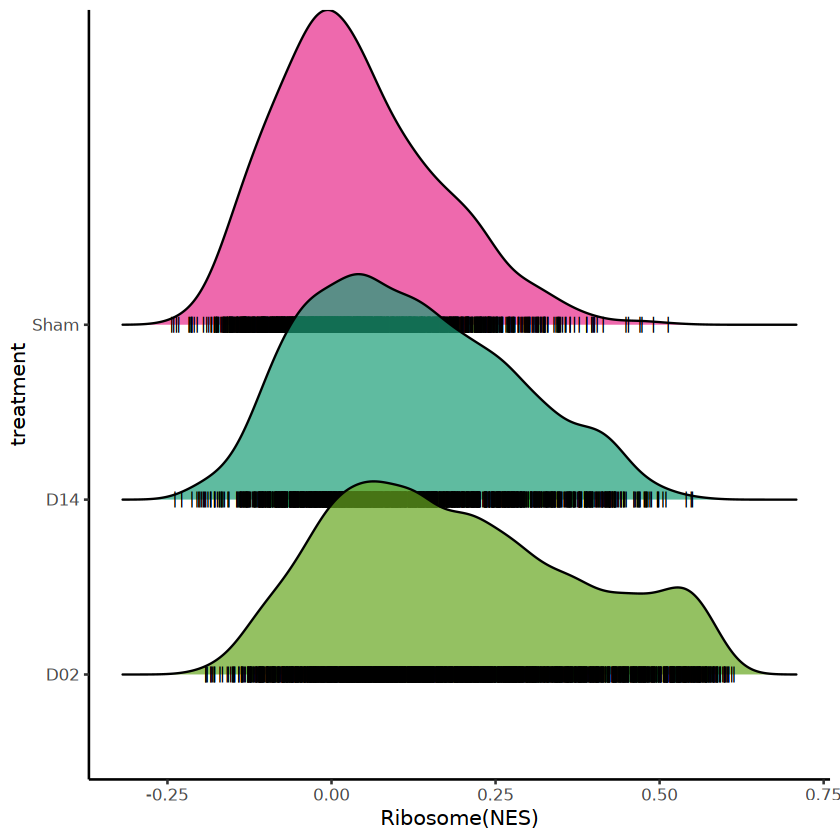

In [109]:
ridgePlot(res_EC, features = "Ribosome", group_by = "treatment")

In [110]:
mmuko %>% head()

=== species is: mouse and Annotation is KEGG  keytype is SYMBOL ===


GeneID PATH  Annot                       
2 Aanat  00380 Tryptophan metabolism       
3 Aanat  01100 Metabolic pathways          
5 Abca1  02010 ABC transporters            
6 Abca1  04975 Fat digestion and absorption
7 Abca4  02010 ABC transporters            
8 Abca2  02010 ABC transporters

In [118]:
tf_regulons <- EC_seurat@misc$SCENIC$Regulons

In [119]:
# Convert to annotation data frame
tf_df <- do.call(rbind, lapply(names(tf_regulons), function(tf) {
  data.frame(GeneID = tf_regulons[[tf]], PATH = tf, Annot = tf, stringsAsFactors = FALSE)
}))

In [120]:
tf_df %>% head()

GeneID PATH Annot
1 Aff4   Ahr  Ahr  
2 Ahr    Ahr  Ahr  
3 Akt2   Ahr  Ahr  
4 Arid5a Ahr  Ahr  
5 Atp2a3 Ahr  Ahr  
6 Cabin1 Ahr  Ahr

In [121]:
res_EC <- scgsva(EC_seurat, tf_df, method="ssgsea", cores = 16) ## or use UCell

i GSVA version 2.0.1

! 1963 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 223 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1617 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 223 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1711 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 223 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 2114 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 223 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1747 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 223 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1976 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 223 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished



In [122]:
res_EC %>% class()

[1] "GSVA"
attr(,"package")
[1] "scGSVA"

In [127]:
res_EC@obj

An object of class Seurat 
14539 features across 5880 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

In [128]:
res_EC@gsva %>% head()

Ahr        Arid3a       Arntl       Atf1        Atf3      
BRS02R1CACAGCCGGTTC 0.04647799  0.043465442 -0.05425721 -0.03611581 0.05783855
BRS02R1TCTCCGGGCTCG 0.01502953  0.042000572  0.01906366 -0.04728201 0.06674567
BRS02R1GCCTTCTCTGAC 0.05787844 -0.016741579 -0.12561298 -0.06718193 0.02788959
BRS02R1GACTACGTTTTT 0.12840564  0.013447887  0.11061944 -0.07104681 0.03969653
BRS02R1TAGGCGAGGATT 0.06380436 -0.005352666 -0.05882860 -0.03464752 0.02364888
BRS02R1ATCAATCGTGTA 0.06898690 -0.006610685 -0.12188256 -0.05634607 0.02684805
                    Bach1         Bach2       Bcl11a     Bcl6       
BRS02R1CACAGCCGGTTC -0.0100219337  0.05744563 0.04977802 -0.16426516
BRS02R1TCTCCGGGCTCG  0.0072459989 -0.07384600 0.05473855 -0.02712126
BRS02R1GCCTTCTCTGAC -0.0008988463  0.01913747 0.07507741 -0.11740636
BRS02R1GACTACGTTTTT  0.0420046498 -0.05667222 0.07835323 -0.14878034
BRS02R1TAGGCGAGGATT  0.0110573505 -0.06408705 0.17113924 -0.17927588
BRS02R1ATCAATCGTGTA  0.0378514441 -0.05503134 0.13254001 -0.17292931
                    Bcl6b        ... Zfp667       Zfp74      Zfp760      
BRS02R1CACAGCCGGTTC  0.120345909 ... -0.001735620 -0.1246550 -0.029298241
BRS02R1TCTCCGGGCTCG  0.063007762 ...  0.001442033 -0.1196187 -0.057933512
BRS02R1GCCTTCTCTGAC -0.018704556 ...  0.020248901 -0.1065820 -0.017180815
BRS02R1GACTACGTTTTT  0.217677899 ...  0.023806490 -0.1048265 -0.069337400
BRS02R1TAGGCGAGGATT  0.007730667 ...  0.074401034 -0.1115319 -0.077239837
BRS02R1ATCAATCGTGTA  0.084814942 ...  0.025136269 -0.1032724 -0.009577019
                    Zfp784      Zfx        Zic1       Zic3       Zic4        
BRS02R1CACAGCCGGTTC -0.18123441 0.04106869 0.04276797 0.16255897  0.012917542
BRS02R1TCTCCGGGCTCG -0.17821150 0.04127539 0.04275585 0.09595454 -0.037334359
BRS02R1GCCTTCTCTGAC -0.05308521 0.03770200 0.05154259 0.09136258 -0.020557157
BRS02R1GACTACGTTTTT -0.04969340 0.04680225 0.13000524 0.12338072  0.034439411
BRS02R1TAGGCGAGGATT -0.17072979 0.03604555 0.11709111 0.13218794 -0.007315578
BRS02R1ATCAATCGTGTA -0.04857004 0.04410040 0.06578980 0.07773155  0.021088997
                    Zic5       Zscan22   
BRS02R1CACAGCCGGTTC 0.05147861 0.08281676
BRS02R1TCTCCGGGCTCG 0.09542951 0.05417374
BRS02R1GCCTTCTCTGAC 0.01798380 0.06206751
BRS02R1GACTACGTTTTT 0.05002591 0.15237092
BRS02R1TAGGCGAGGATT 0.14281835 0.03589050
BRS02R1ATCAATCGTGTA 0.08519112 0.07111533

In [130]:
res_EC@annot %>% head()

GeneID PATH Annot
1 Aff4   Ahr  Ahr  
2 Ahr    Ahr  Ahr  
3 Akt2   Ahr  Ahr  
4 Arid5a Ahr  Ahr  
5 Atp2a3 Ahr  Ahr  
6 Cabin1 Ahr  Ahr

In [132]:
## Find significant pathways across groups:

df_find_pathway <- findPathway(res_EC, group = "treatment")

In [133]:
df_find_pathway %>% dim()

[1] 446   8

In [134]:
df_sig_pathway <- sigPathway(res_EC, group = "treatment")

In [135]:
df_sig_pathway %>% dim()

[1] 669   6

In [136]:
df_find_pathway %>% head()

logFC        AveExpr    t         P.Value       adj.P.Val     B        term 
1  0.009847188 0.05203254  24.36645 5.150876e-125 1.148645e-122 272.9286 Spi1 
2 -0.025197243 0.10517660 -19.18575  1.267397e-79  1.413147e-77 168.6171 Gata2
3 -0.005138760 0.02924508 -17.91950  5.867904e-70  4.361809e-68 146.4222 Jund 
4 -0.004774391 0.02233963 -17.84015  2.262845e-69  1.261536e-67 145.0764 Fosb 
5 -0.004481641 0.07145477 -16.24014  4.739581e-58  2.113853e-56 119.0938 Yy1  
6 -0.002800378 0.02109744 -15.57164  1.319395e-53  4.903751e-52 108.8981 Rel  
  comparision
1 D02_vs_Sham
2 D02_vs_Sham
3 D02_vs_Sham
4 D02_vs_Sham
5 D02_vs_Sham
6 D02_vs_Sham

In [137]:
df_sig_pathway %>% head()

Path   group1 group2 statistic p        p.adj       
1 Ahr    D02    D14    1821872   7.32e-07 1.252450e-06
2 Ahr    D02    Sham   1818908   1.65e-23 5.546985e-23
3 Ahr    D14    Sham   1321664   1.04e-04 1.610556e-04
4 Arid3a D02    D14    1811785   1.74e-07 3.055276e-07
5 Arid3a D02    Sham   1840700   3.60e-21 1.104771e-20
6 Arid3a D14    Sham   1339766   1.00e-03 1.420382e-03

In [138]:
df_sig_pathway %>% arrange(p.adj) %>% head(10)

Path  group1 group2 statistic p         p.adj        
1  Fosb  D02    D14     998771   1.03e-162 6.890700e-160
2  Jund  D02    D14    1030617   1.04e-152 3.478800e-150
3  Egr1  D02    D14    1093934   9.17e-134 2.044910e-131
4  Zic3  D02    D14    1112799   2.30e-128 3.846750e-126
5  Gata2 D02    D14    1133809   1.75e-122 2.341500e-120
6  Spi1  D02    Sham   3147736   8.81e-122 9.823150e-120
7  Jund  D02    Sham   1369644   1.03e-100  9.843857e-99
8  Klf2  D02    D14    1222763    3.91e-99  3.269737e-97
9  Thra  D02    D14    1234722    3.47e-96  2.579367e-94
10 Fosb  D02    Sham   1393809    3.76e-95  2.515440e-93

Picking joint bandwidth of 0.00206



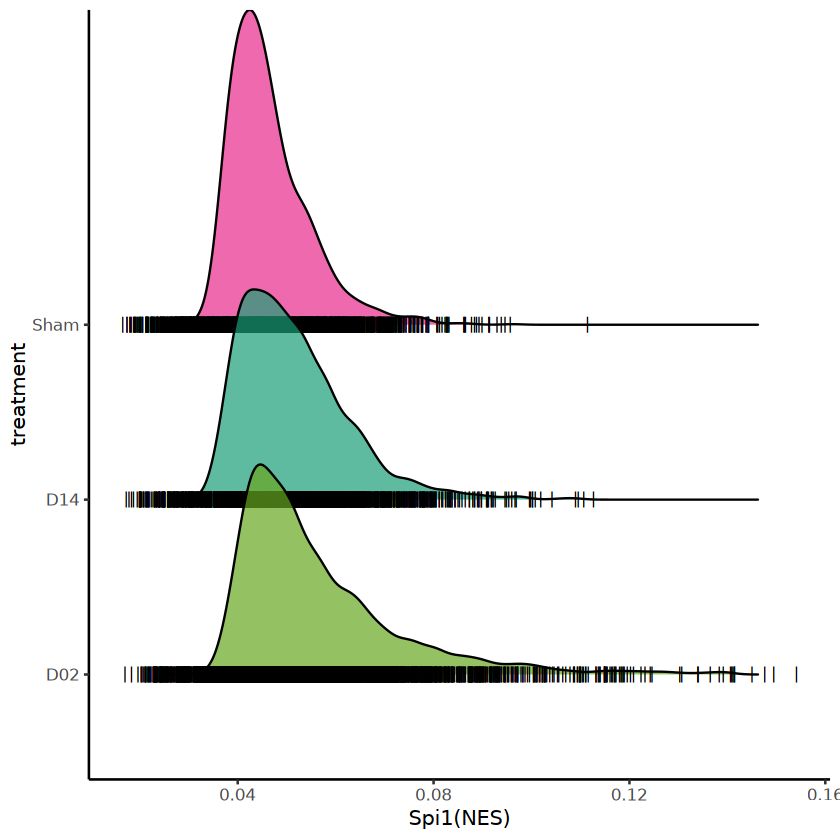

In [140]:
ridgePlot(res_EC, features = "Spi1", group_by = "treatment")

Picking joint bandwidth of 0.00129



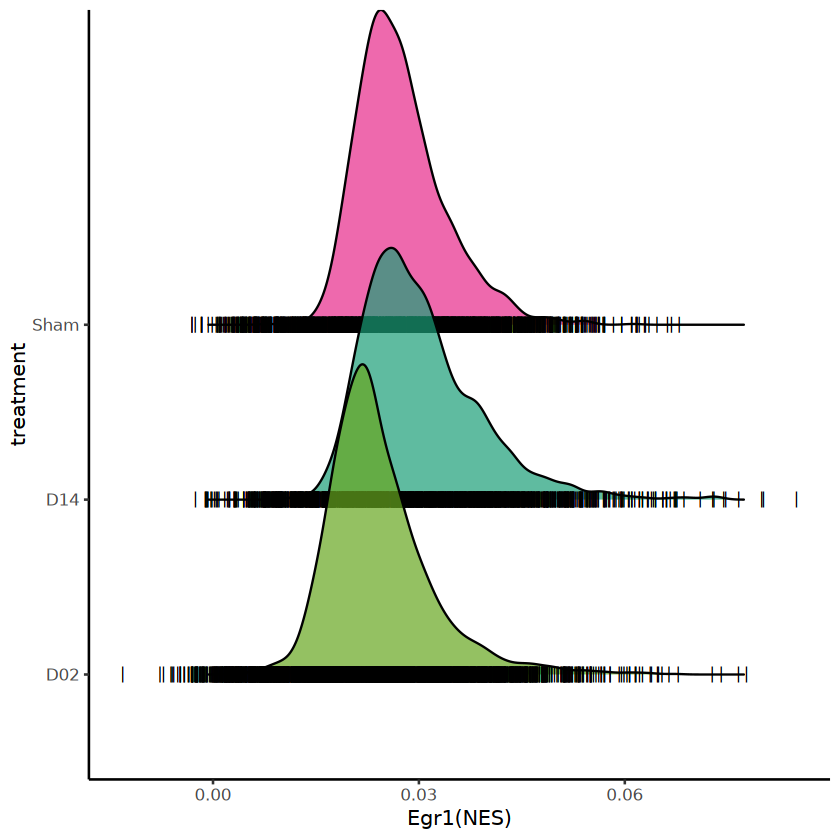

In [141]:
ridgePlot(res_EC, features = "Egr1", group_by = "treatment")

In [142]:
df_sig_pathway %>% 
arrange(p.adj) %>% 
filter(group1 %in% c('D02', 'Sham')) %>% 
filter(group2 %in% c('D02', 'Sham')) %>% 
head(20)

Path   group1 group2 statistic p         p.adj        
1  Spi1   D02    Sham   3147736   8.81e-122 9.823150e-120
2  Jund   D02    Sham   1369644   1.03e-100  9.843857e-99
3  Fosb   D02    Sham   1393809    3.76e-95  2.515440e-93
4  Gata2  D02    Sham   1399727    8.17e-94  4.968845e-92
5  Egr1   D02    Sham   1505973    1.95e-71  6.522750e-70
6  Yy1    D02    Sham   1529330    6.24e-67  1.739400e-65
7  Ebf1   D02    Sham   1542033    1.52e-64  4.067520e-63
8  Zic3   D02    Sham   1555739    5.10e-62  1.218536e-60
9  Nr3c1  D02    Sham   1564014    1.61e-60  3.590300e-59
10 Klf4   D02    Sham   1566729    4.96e-60  1.070400e-58
11 Dbp    D02    Sham   1600094    3.37e-54  6.630971e-53
12 Nfatc1 D02    Sham   1609014    1.08e-52  2.064343e-51
13 Bcl11a D02    Sham   1611906    3.30e-52  5.966757e-51
14 Elf1   D02    Sham   1612068    3.51e-52  6.179447e-51
15 Nfe2   D02    Sham   1616488    1.91e-51  3.276385e-50
16 Klf2   D02    Sham   1618485    4.09e-51  6.840525e-50
17 Rel    D02    Sham   1619718    6.53e-51  1.065505e-49
18 Irf9   D02    Sham   1620176    7.77e-51  1.237650e-49
19 Zic1   D02    Sham   1627463    1.21e-49  1.759761e-48
20 Bach1  D02    Sham   1631997    6.58e-49  9.366000e-48

Picking joint bandwidth of 0.0033



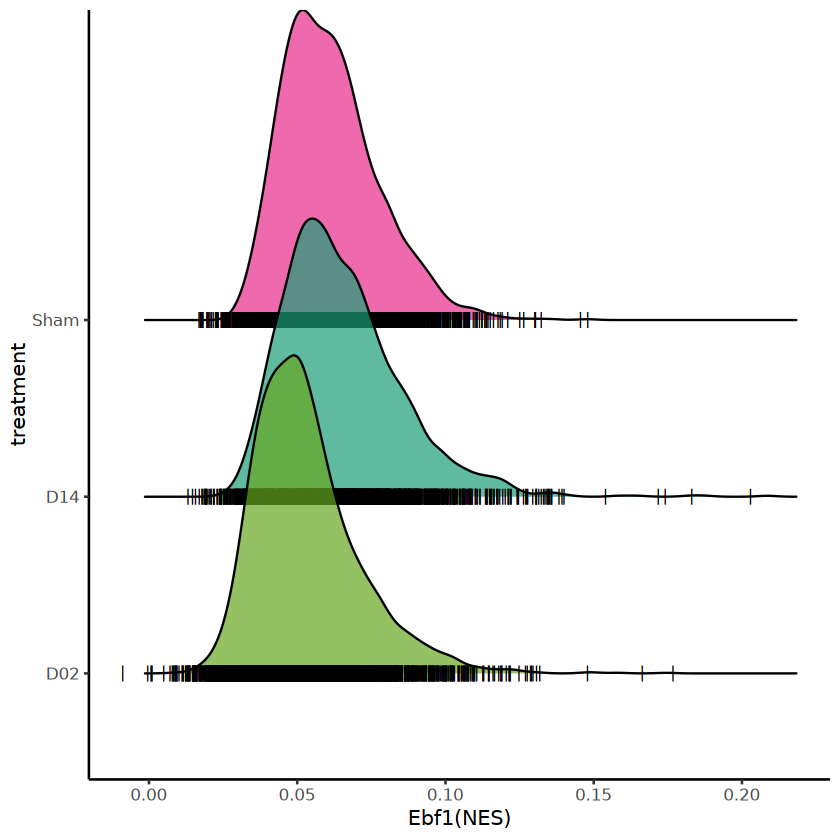

In [143]:
ridgePlot(res_EC, features = "Ebf1", group_by = "treatment")

Picking joint bandwidth of 0.00412



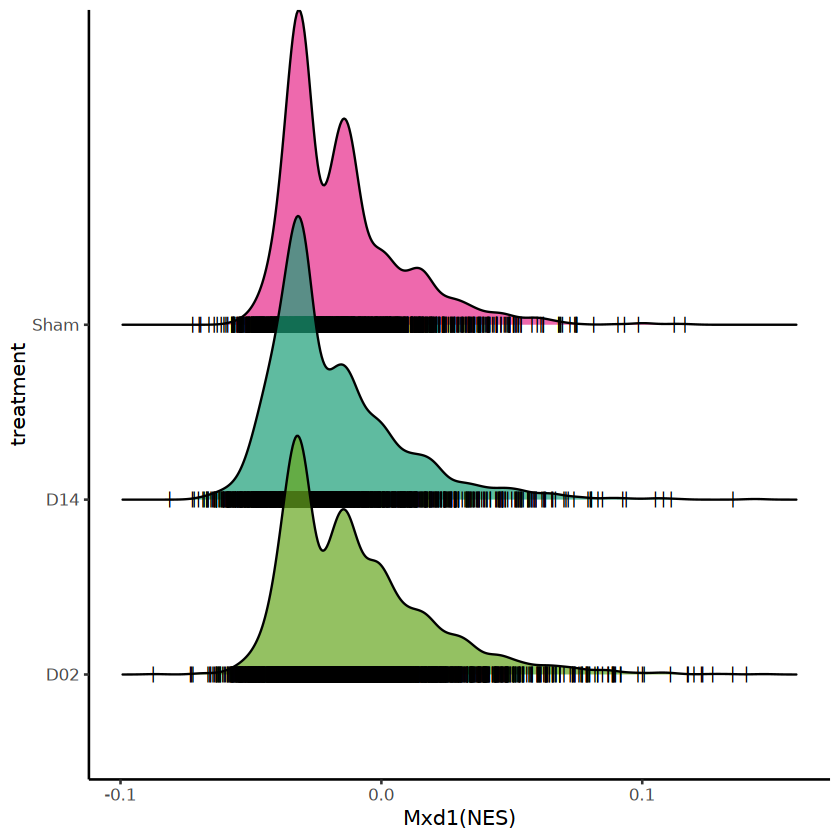

In [144]:
ridgePlot(res_EC, features = "Mxd1", group_by = "treatment")

Picking joint bandwidth of 0.00306



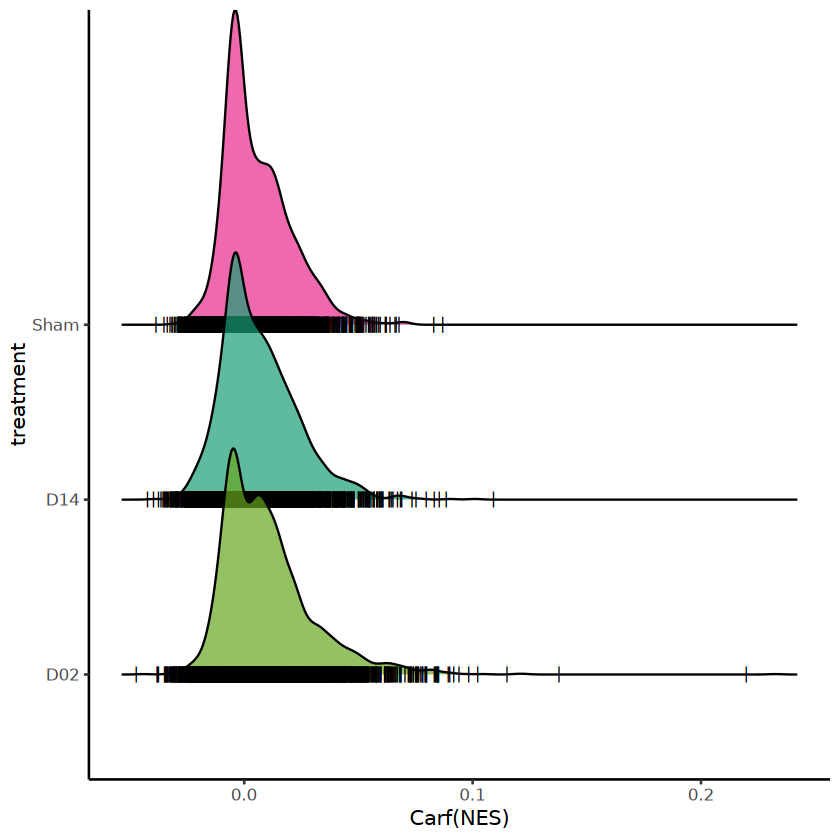

In [145]:
ridgePlot(res_EC, features = "Carf", group_by = "treatment")

Picking joint bandwidth of 0.00159



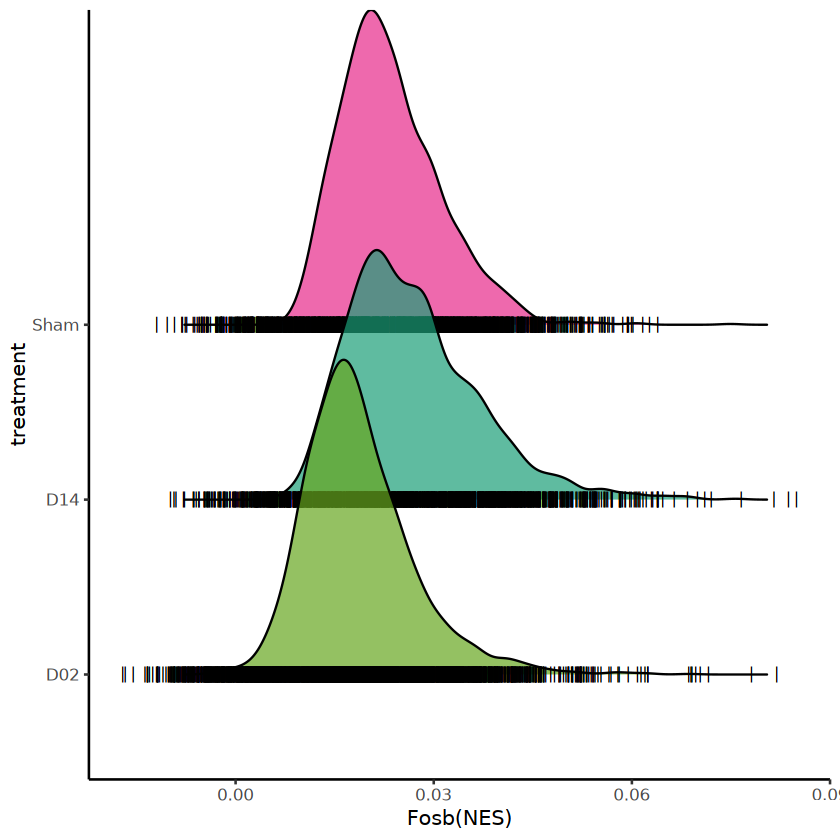

In [146]:
ridgePlot(res_EC, features = "Fosb", group_by = "treatment")

Picking joint bandwidth of 0.00228



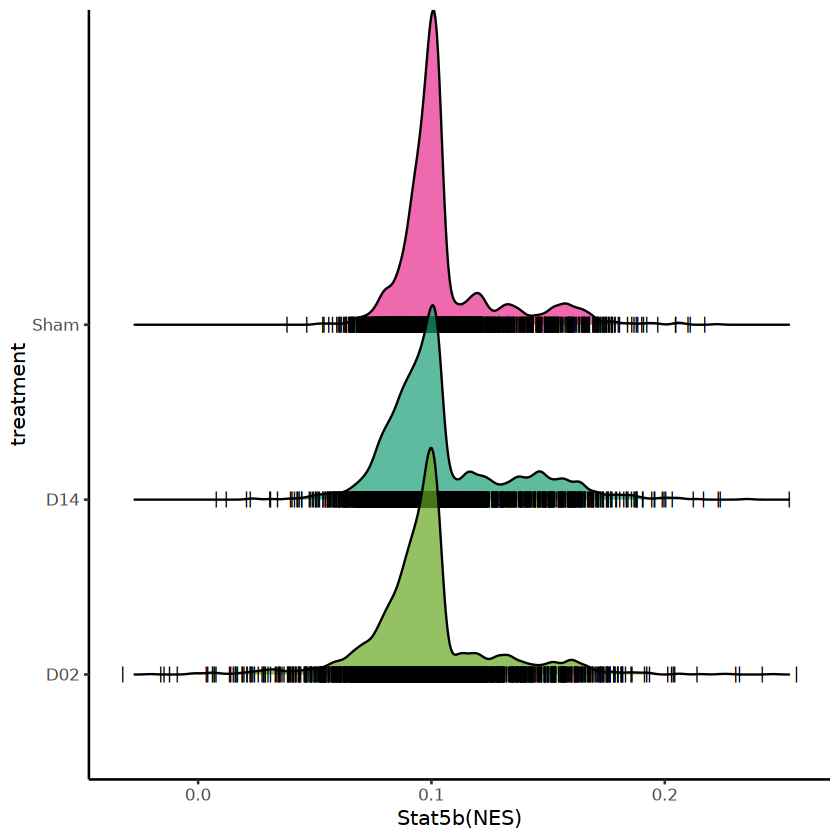

In [147]:
ridgePlot(res_EC, features = "Stat5b", group_by = "treatment")

Picking joint bandwidth of 0.00193



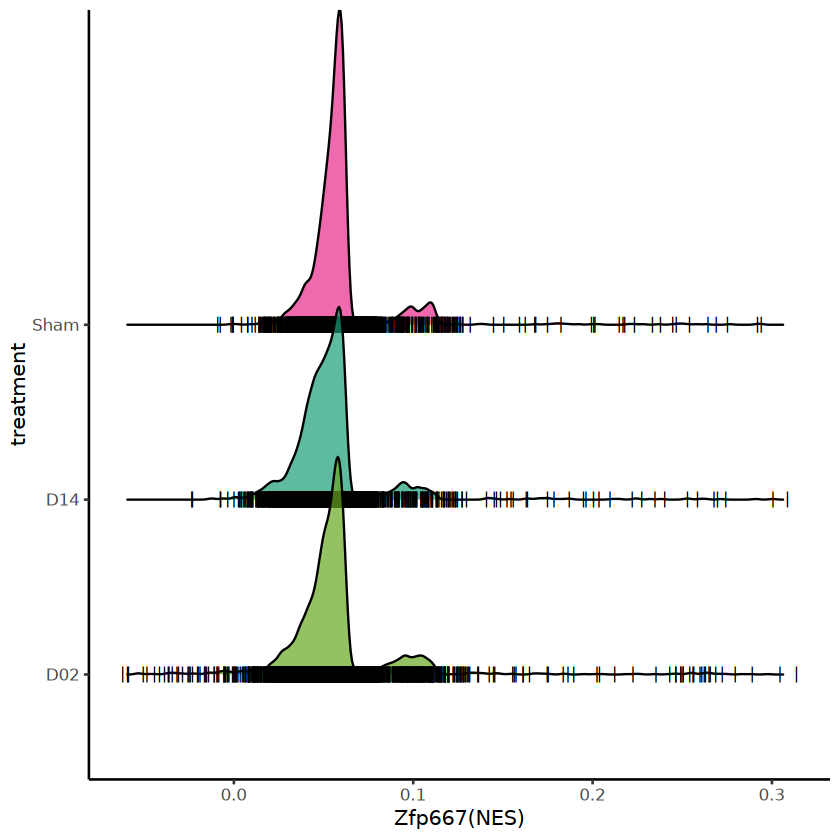

In [148]:
ridgePlot(res_EC, features = "Zfp667", group_by = "treatment")

Picking joint bandwidth of 0.00148



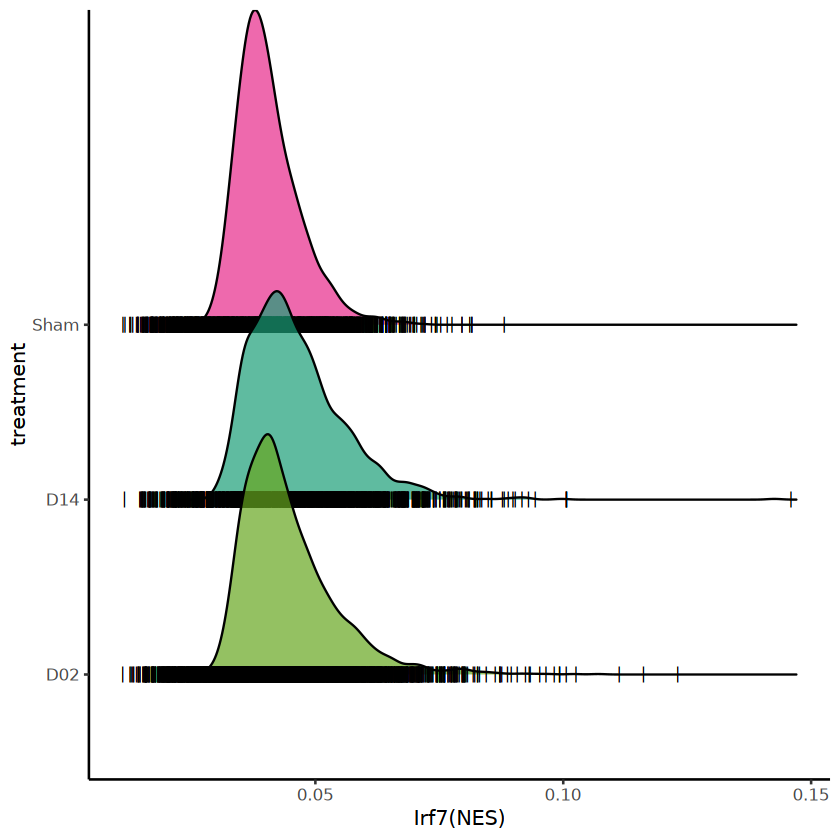

In [149]:
ridgePlot(res_EC, features = "Irf7", group_by = "treatment")

Picking joint bandwidth of 0.00163



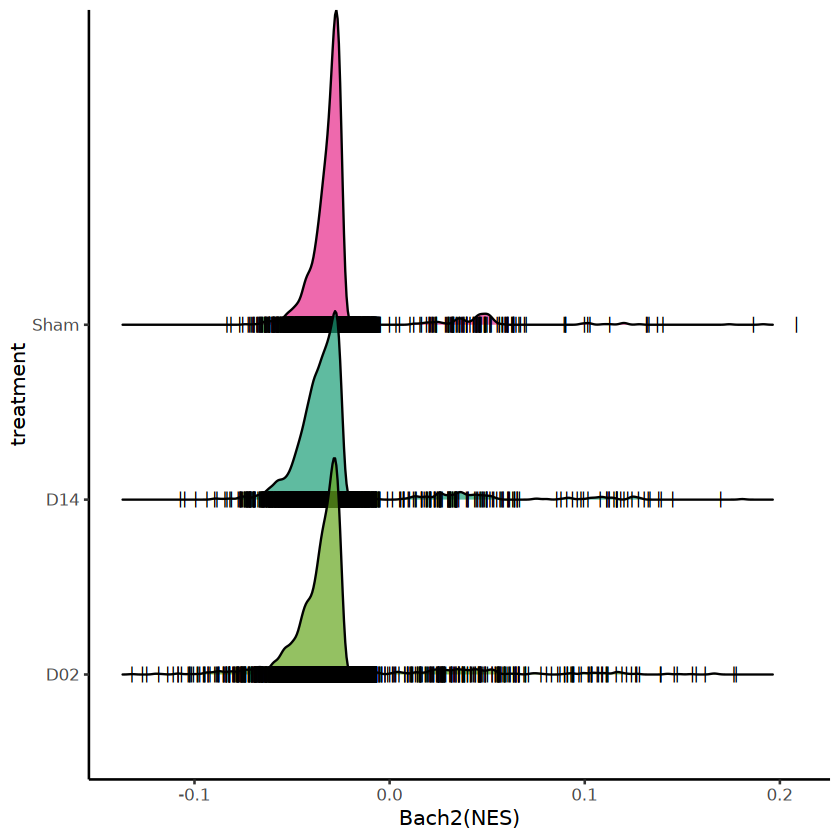

In [150]:
ridgePlot(res_EC, features = "Bach2", group_by = "treatment")

Picking joint bandwidth of 0.00222



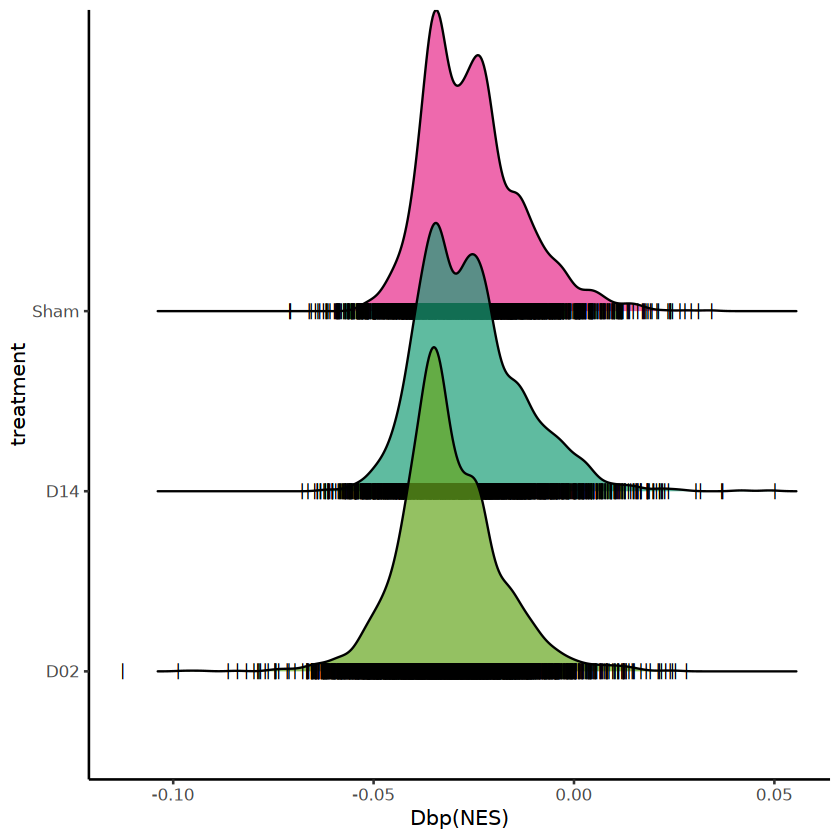

In [154]:
ridgePlot(res_EC, features = c("Dbp"), group_by = "treatment")

Picking joint bandwidth of 0.00163

Picking joint bandwidth of 0.00222



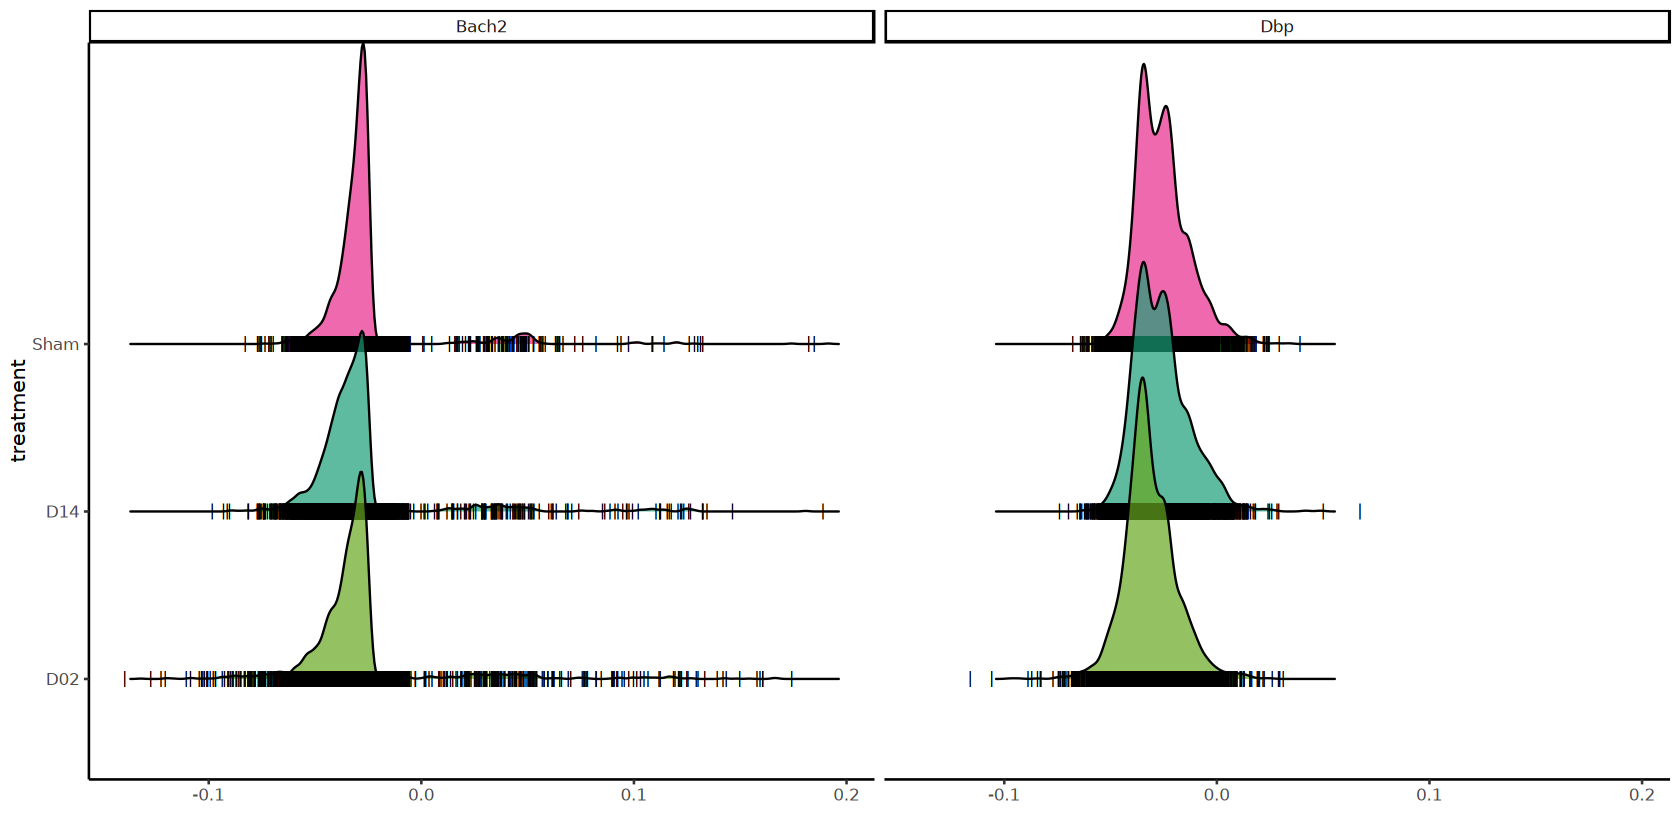

In [156]:
options(repr.plot.width = 14, repr.plot.height = 7) 

ridgePlot(res_EC, features = c("Dbp", "Bach2"), group_by = "treatment")

In [162]:
mmuReactome <- buildAnnot(species="mouse", keytype="SYMBOL", anntype="Reactome")

Warning message in list2env(x):
"unable to translate 'Bos taurus: Activation of IRF3, IRF7 mediated by TBK1, IKK<U+03B5> (IKBKE)' to native encoding"
Warning message in list2env(x):
"unable to translate 'Bos taurus: Biosynthesis of electrophilic <U+03C9>-3 PUFA oxo-derivatives' to native encoding"
Warning message in list2env(x):
"unable to translate 'Bos taurus: Regulation of TBK1, IKK<U+03B5> (IKBKE)-mediated activation of IRF3, IRF7' to native encoding"
Warning message in list2env(x):
"unable to translate 'Canis familiaris: Activation of IRF3, IRF7 mediated by TBK1, IKK<U+03B5> (IKBKE)' to native encoding"
Warning message in list2env(x):
"unable to translate 'Canis familiaris: Biosynthesis of electrophilic <U+03C9>-3 PUFA oxo-derivatives' to native encoding"
Warning message in list2env(x):
"unable to translate 'Canis familiaris: Regulation of TBK1, IKK<U+03B5> (IKBKE)-mediated activation of IRF3, IRF7' to native encoding"
Warning message in list2env(x):
"unable to translate 'Danio re

In [163]:
mmuReactome %>% head()

=== species is: mouse and Annotation is Reactome  keytype is SYMBOL ===


GeneID  Annot                                                          
1 Prps2   5-Phosphoribose 1-diphosphate biosynthesis                     
2 Prps1   5-Phosphoribose 1-diphosphate biosynthesis                     
3 Prps1l3 5-Phosphoribose 1-diphosphate biosynthesis                     
4 Prps1l1 5-Phosphoribose 1-diphosphate biosynthesis                     
5 Gpc5    A tetrasaccharide linker sequence is required for GAG synthesis
6 B3galt6 A tetrasaccharide linker sequence is required for GAG synthesis

In [164]:
mmuReactome %>% dim()

[1] 84090     2

In [165]:
mmuReactome$Annot %>% unique() %>% length()

[1] 1759

In [166]:
res_EC_TF_reg <- res_EC

we set useTerm=F, if we just have two columns.

In [168]:
res_EC <- scgsva(EC_seurat, mmuReactome, method="ssgsea", cores = 16, useTerm = F) ## or use UCell

i GSVA version 2.0.1

! 1963 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 1698 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1617 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 1698 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1711 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 1698 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 2114 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 1698 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1747 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 1698 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished

i GSVA version 2.0.1

! 1976 genes with constant values throughout the samples

! Some gene sets have size one. Consider setting minSize > 1

i Using a MulticoreParam parallel back-end with 16 workers

i Calculating  ssGSEA scores for 1698 gene sets

i Calculating ranks

i Calculating rank weights



  |======================================================================| 100%



v Calculations finished



In [169]:
df_find_pathway_TF_reg <- df_find_pathway

df_sig_pathway_TF_reg <- df_sig_pathway

In [170]:
## Find significant pathways across groups:

df_find_pathway <- findPathway(res_EC, group = "treatment")

In [171]:
df_find_pathway %>% dim()

[1] 3396    8

In [173]:
df_find_pathway %>% head()

logFC      AveExpr    t        P.Value       adj.P.Val     B       
1 0.03877620 0.09806574 32.28458 1.159908e-210 1.969525e-207 470.3061
2 0.08909389 0.16534057 31.33001 2.115786e-199 1.796302e-196 444.3993
3 0.07955336 0.17508425 31.25915 1.418540e-198 8.028934e-196 442.4982
4 0.07903323 0.17400987 31.02026 8.471857e-196 3.596303e-193 436.1118
5 0.08015605 0.17312024 30.96647 3.556469e-195 1.207777e-192 434.6785
6 0.09331843 0.15547946 30.90503 1.826556e-194 5.169152e-192 433.0438
  term                                                                                                  
1 Translation                                                                                           
2 Formation.of.the.ternary.complex..and.subsequently..the.43S.complex                                   
3 Ribosomal.scanning.and.start.codon.recognition                                                        
4 Activation.of.the.mRNA.upon.binding.of.the.cap.binding.complex.and.eIFs..and.subsequent.binding.to.43S
5 Translation.initiation.complex.formation                                                              
6 Formation.of.a.pool.of.free.40S.subunits                                                              
  comparision
1 D02_vs_Sham
2 D02_vs_Sham
3 D02_vs_Sham
4 D02_vs_Sham
5 D02_vs_Sham
6 D02_vs_Sham

In [186]:
# Following took too much so I interrupted.

# df_sig_pathway <- sigPathway(res_EC, group = "treatment")

In [187]:
df_find_pathway %>% summary()

     logFC              AveExpr               t              P.Value         
 Min.   :-0.088898   Min.   :-0.49649   Min.   :-21.754   Min.   :0.0000000  
 1st Qu.:-0.002288   1st Qu.:-0.04132   1st Qu.: -2.704   1st Qu.:0.0000000  
 Median : 0.001680   Median : 0.03058   Median :  1.676   Median :0.0000002  
 Mean   : 0.004991   Mean   : 0.03670   Mean   :  2.596   Mean   :0.0946817  
 3rd Qu.: 0.008320   3rd Qu.: 0.10891   3rd Qu.:  8.020   3rd Qu.:0.0277297  
 Max.   : 0.167580   Max.   : 0.42750   Max.   : 32.285   Max.   :1.0000000  
   adj.P.Val               B               term           comparision       
 Min.   :0.0000000   Min.   : -9.523   Length:3396        Length:3396       
 1st Qu.:0.0000000   1st Qu.: -7.019   Class :character   Class :character  
 Median :0.0000005   Median :  3.849   Mode  :character   Mode  :character  
 Mean   :0.1030450   Mean   : 28.930                                        
 3rd Qu.:0.0368160   3rd Qu.: 36.968                                 

In [188]:
df_find_pathway %>% arrange(adj.P.Val) %>% head(20)

logFC      AveExpr    t        P.Value       adj.P.Val     B       
1  0.03877620 0.09806574 32.28458 1.159908e-210 1.969525e-207 470.3061
2  0.08909389 0.16534057 31.33001 2.115786e-199 1.796302e-196 444.3993
3  0.07955336 0.17508425 31.25915 1.418540e-198 8.028934e-196 442.4982
4  0.07903323 0.17400987 31.02026 8.471857e-196 3.596303e-193 436.1118
5  0.08015605 0.17312024 30.96647 3.556469e-195 1.207777e-192 434.6785
6  0.09331843 0.15547946 30.90503 1.826556e-194 5.169152e-192 433.0438
7  0.07821111 0.17174245 30.82493 1.536621e-193 3.727405e-191 430.9161
8  0.11691183 0.07990458 30.75464 9.926880e-193 2.106980e-190 429.0522
9  0.07121652 0.17631371 30.67373 8.468801e-192 1.438002e-189 426.9105
10 0.07121652 0.17631371 30.67373 8.468801e-192 1.438002e-189 426.9105
11 0.08000033 0.16830610 30.62210 3.318568e-191 5.122663e-189 425.5460
12 0.10710436 0.10934945 30.51669 5.368237e-190 7.596056e-188 422.7652
13 0.04433399 0.02895979 30.46594 2.045133e-189 2.315090e-187 421.4289
14 0.04433399 0.02895979 30.46594 2.045133e-189 2.315090e-187 421.4289
15 0.04433399 0.02895979 30.46594 2.045133e-189 2.315090e-187 421.4289
16 0.07991571 0.04903194 30.06984 6.612058e-185 6.604279e-183 411.0553
17 0.07991571 0.04903194 30.06984 6.612058e-185 6.604279e-183 411.0553
18 0.02311023 0.07821170 28.45987 5.012242e-167 4.728215e-165 369.9291
19 0.02009150 0.04326803 28.15149 1.097468e-163 9.807902e-162 362.2464
20 0.01099044 0.02762305 27.25967 3.499270e-154 2.970880e-152 340.3896
   term                                                                                                  
1  Translation                                                                                           
2  Formation.of.the.ternary.complex..and.subsequently..the.43S.complex                                   
3  Ribosomal.scanning.and.start.codon.recognition                                                        
4  Activation.of.the.mRNA.upon.binding.of.the.cap.binding.complex.and.eIFs..and.subsequent.binding.to.43S
5  Translation.initiation.complex.formation                                                              
6  Formation.of.a.pool.of.free.40S.subunits                                                              
7  GTP.hydrolysis.and.joining.of.the.60S.ribosomal.subunit                                               
8  SRP.dependent.cotranslational.protein.targeting.to.membrane                                           
9  Cap.dependent.Translation.Initiation                                                                  
10 Eukaryotic.Translation.Initiation                                                                     
11 L13a.mediated.translational.silencing.of.Ceruloplasmin.expression                                     
12 Nonsense.Mediated.Decay..NMD..independent.of.the.Exon.Junction.Complex..EJC.                          
13 Major.pathway.of.rRNA.processing.in.the.nucleolus.and.cytosol                                         
14 rRNA.processing                                                                                       
15 rRNA.processing.in.the.nucleus.and.cytosol                                                            
16 Nonsense.Mediated.Decay..NMD..enhanced.by.the.Exon.Junction.Complex..EJC.                             
17 Nonsense.Mediated.Decay..NMD.                                                                         
18 Respiratory.electron.transport                                                                        
19 Aerobic.respiration.and.respiratory.electron.transport                                                
20 Metabolism.of.proteins                                                                                
   comparision
1  D02_vs_Sham
2  D02_vs_Sham
3  D02_vs_Sham
4  D02_vs_Sham
5  D02_vs_Sham
6  D02_vs_Sham
7  D02_vs_Sham
8  D02_vs_Sham
9  D02_vs_Sham
10 D02_vs_Sham
11 D02_vs_Sham
12 D02_vs_Sham
13 D02_vs_Sham
14 D02_vs_Sham
15 D02_vs_Sham
16 D02_vs_Sham
17 D02_vs_Sham
18 D02_vs_Sham
1

In [190]:
df_find_pathway %>% arrange(adj.P.Val) %>% filter(grepl(x = term, pattern = 'transport', ignore.case = T)) %>% head()

logFC       AveExpr     t        P.Value       adj.P.Val     B       
1 0.023110228  0.07821170 28.45987 5.012242e-167 4.728215e-165 369.9291
2 0.020091503  0.04326803 28.15149 1.097468e-163 9.807902e-162 362.2464
3 0.026289831  0.08973990 24.50504 2.370214e-126 7.060743e-125 276.3949
4 0.008762760  0.02481825 17.85195  1.852580e-69  1.861349e-68 145.6722
5 0.037046887 -0.29112907 17.07357  7.907402e-64  7.297157e-63 132.7487
6 0.008866973  0.02044654 16.53323  4.717236e-60  3.985009e-59 124.0844
  term                                                   comparision
1 Respiratory.electron.transport                         D02_vs_Sham
2 Aerobic.respiration.and.respiratory.electron.transport D02_vs_Sham
3 ABC.family.proteins.mediated.transport                 D02_vs_Sham
4 Golgi.to.ER.retrograde.transport                       D02_vs_Sham
5 Transport.of.connexons.to.the.plasma.membrane          D02_vs_Sham
6 ER.to.Golgi.Anterograde.Transport                      D02_vs_Sham

Picking joint bandwidth of 0.00559



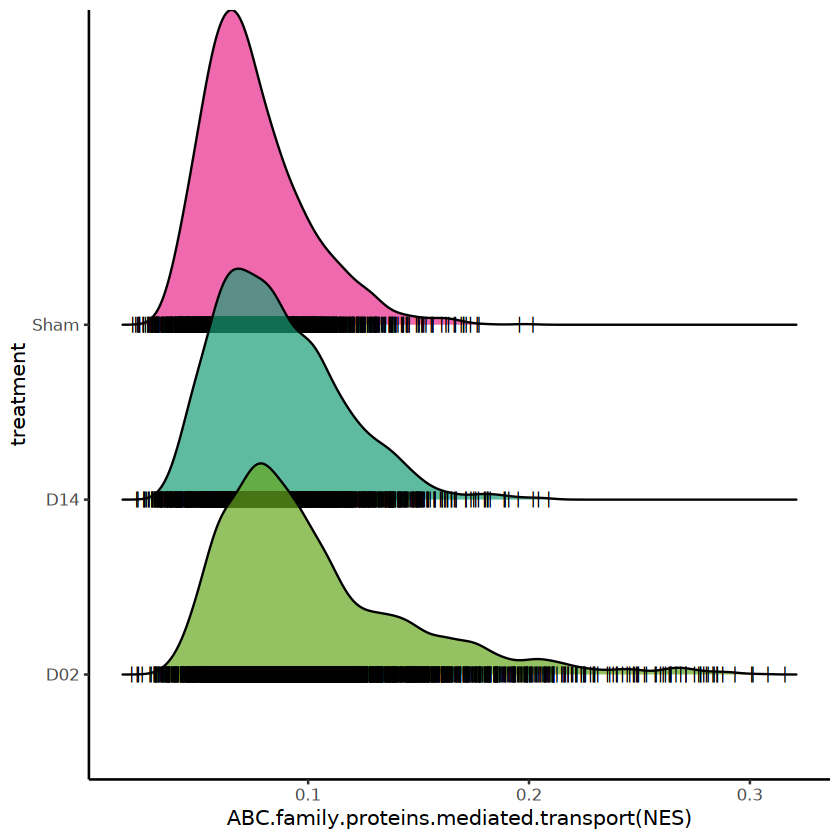

In [192]:
options(repr.plot.width = 7, repr.plot.height = 7)

ridgePlot(res_EC, features = c("ABC.family.proteins.mediated.transport"), group_by = "treatment")

In [193]:
df_find_pathway %>% arrange(adj.P.Val) %>% filter(grepl(x = term, pattern = 'hypox', ignore.case = T)) %>% head()

logFC        AveExpr      t         P.Value       adj.P.Val     B         
1  0.039978781 -0.022788885 24.448766 8.290579e-126 2.234508e-124 275.144728
2  0.037012834 -0.006768387 24.439260 1.024115e-125 2.717105e-124 274.933762
3  0.017684379 -0.022788885  9.759363  2.483509e-22  1.841484e-21  37.825642
4  0.016287369 -0.006768387  9.704896  4.206967e-22  2.976429e-21  37.303914
5 -0.007241116  0.264311344 -6.782567  1.296156e-11  2.635775e-11  13.391826
6 -0.003070897  0.264311344 -2.595721  9.462738e-03  1.490513e-02  -6.052955
  term                                                                    
1 Oxygen.dependent.proline.hydroxylation.of.Hypoxia.inducible.Factor.Alpha
2 Cellular.response.to.hypoxia                                            
3 Oxygen.dependent.proline.hydroxylation.of.Hypoxia.inducible.Factor.Alpha
4 Cellular.response.to.hypoxia                                            
5 Regulation.of.gene.expression.by.Hypoxia.inducible.Factor               
6 Regulation.of.gene.expression.by.Hypoxia.inducible.Factor               
  comparision
1 D02_vs_Sham
2 D02_vs_Sham
3 D14_vs_Sham
4 D14_vs_Sham
5 D02_vs_Sham
6 D14_vs_Sham

Picking joint bandwidth of 0.00863



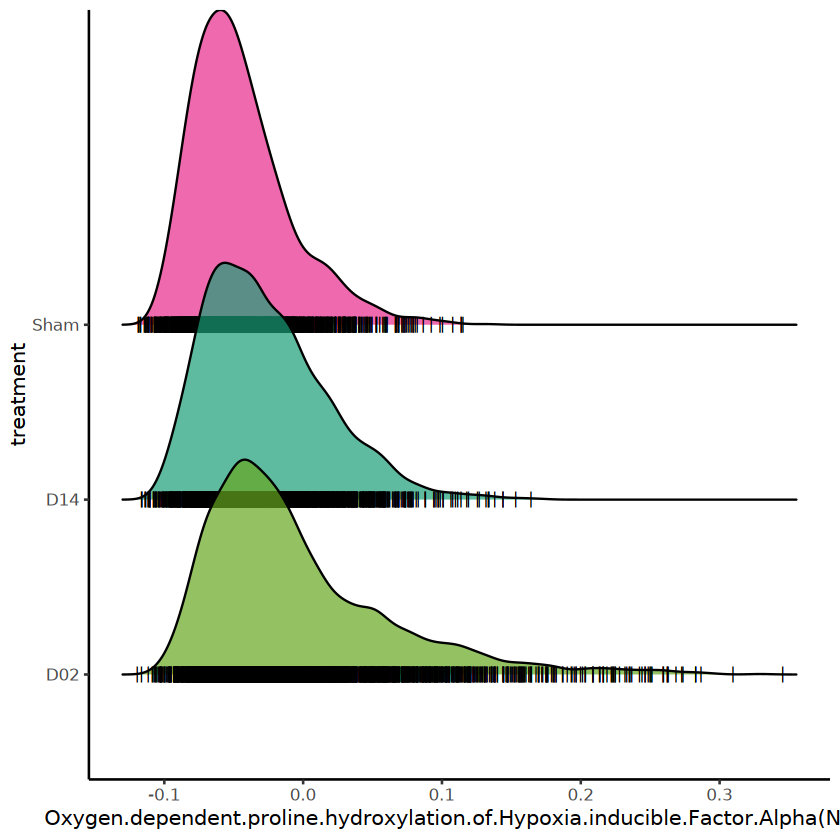

In [194]:
ridgePlot(res_EC, features = c("Oxygen.dependent.proline.hydroxylation.of.Hypoxia.inducible.Factor.Alpha"), group_by = "treatment")

Picking joint bandwidth of 0.00801



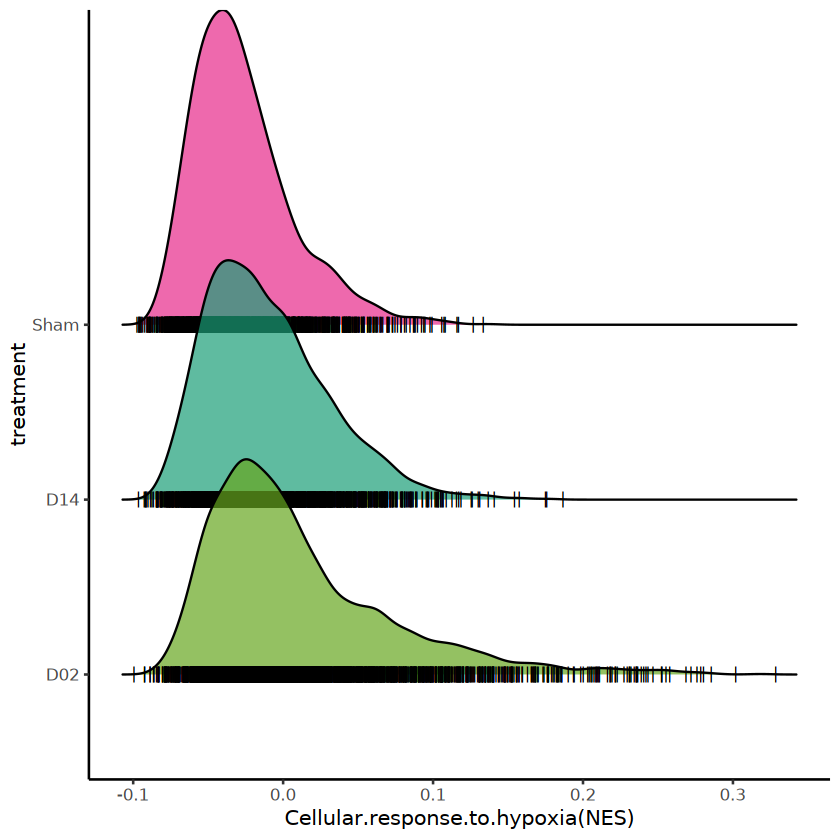

In [195]:
ridgePlot(res_EC, features = c("Cellular.response.to.hypoxia"), group_by = "treatment")

Picking joint bandwidth of 0.00664



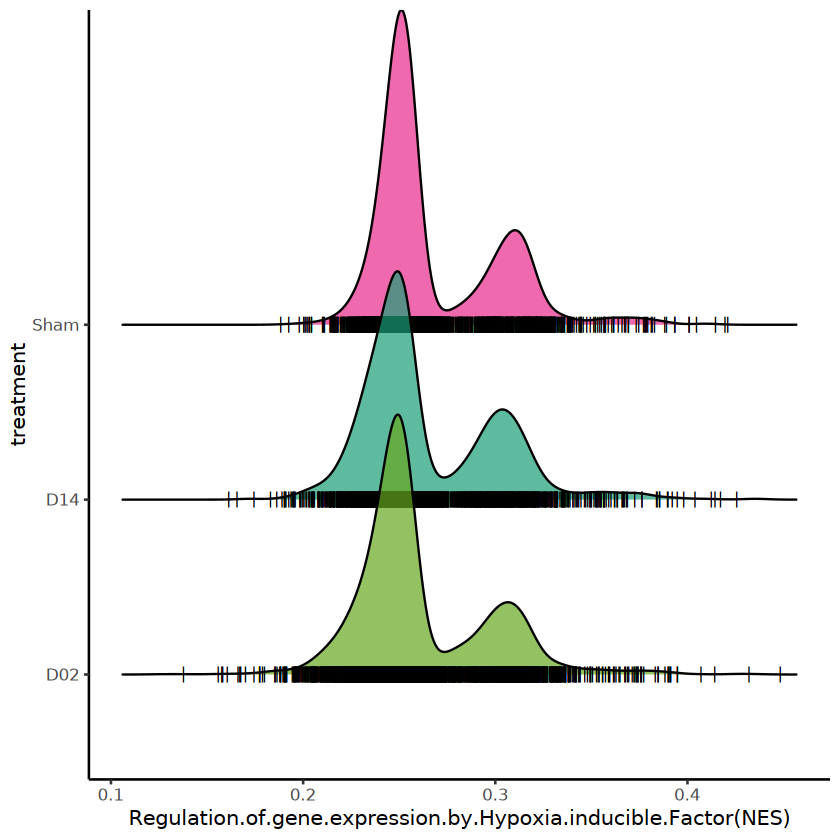

In [196]:
ridgePlot(res_EC, features = c("Regulation.of.gene.expression.by.Hypoxia.inducible.Factor"), group_by = "treatment")

Picking joint bandwidth of 0.00863



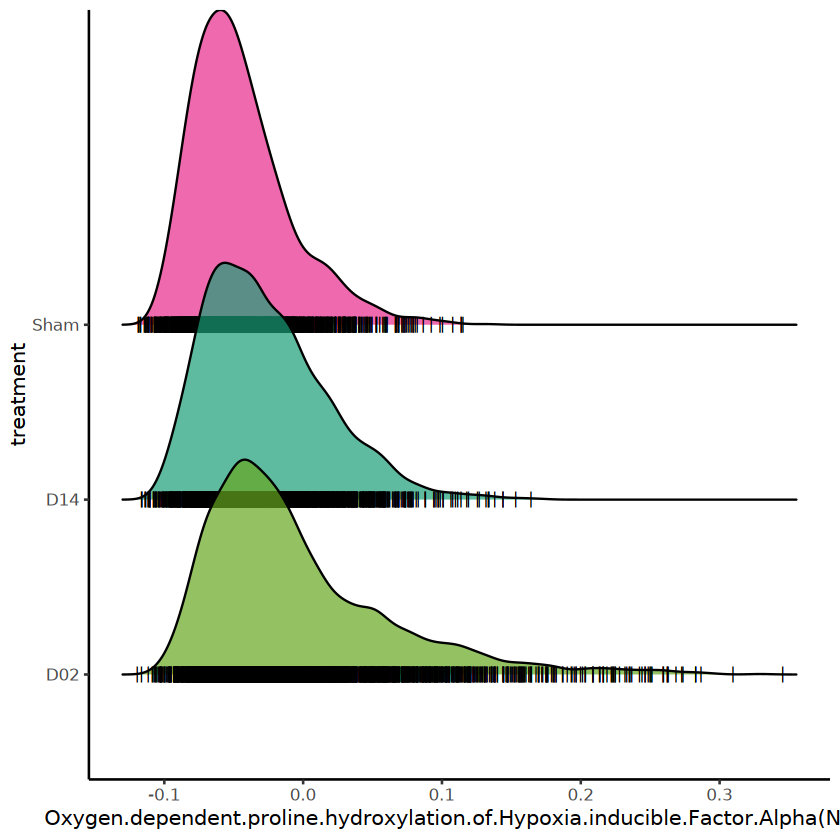

In [194]:
ridgePlot(res_EC, features = c("Oxygen.dependent.proline.hydroxylation.of.Hypoxia.inducible.Factor.Alpha"), group_by = "treatment")

Picking joint bandwidth of 0.00422



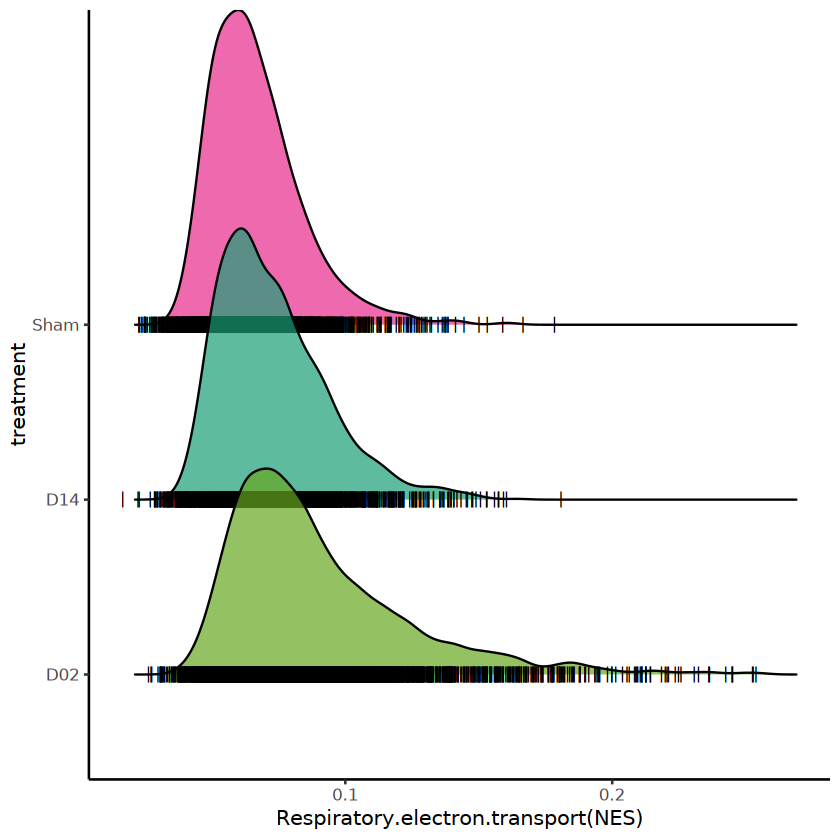

In [197]:
ridgePlot(res_EC, features = c("Respiratory.electron.transport"), group_by = "treatment")

In [202]:
df_find_pathway %>% arrange(adj.P.Val) %>% filter(grepl(x = term, pattern = 'oxygen', ignore.case = T)) %>% head()

logFC        AveExpr     t          P.Value       adj.P.Val     B        
1  0.039978781 -0.02278888  24.448766 8.290579e-126 2.234508e-124 275.14473
2  0.028474318  0.01096594  22.748550 7.292109e-110 1.095752e-108 238.49315
3 -0.008978931  0.25787612 -12.315311  1.985107e-34  7.424476e-34  65.35760
4 -0.012395313  0.25033762 -12.036898  5.538308e-33  2.005127e-32  62.05062
5  0.017684379 -0.02278888   9.759363  2.483509e-22  1.841484e-21  37.82564
6 -0.005946548  0.28867223  -7.024815  2.385864e-12  4.970794e-12  15.05097
  term                                                                    
1 Oxygen.dependent.proline.hydroxylation.of.Hypoxia.inducible.Factor.Alpha
2 Detoxification.of.Reactive.Oxygen.Species                               
3 Erythrocytes.take.up.carbon.dioxide.and.release.oxygen                  
4 Erythrocytes.take.up.oxygen.and.release.carbon.dioxide                  
5 Oxygen.dependent.proline.hydroxylation.of.Hypoxia.inducible.Factor.Alpha
6 Reversal.of.alkylation.damage.by.DNA.dioxygenases                       
  comparision
1 D02_vs_Sham
2 D02_vs_Sham
3 D02_vs_Sham
4 D02_vs_Sham
5 D14_vs_Sham
6 D02_vs_Sham

Picking joint bandwidth of 0.00712



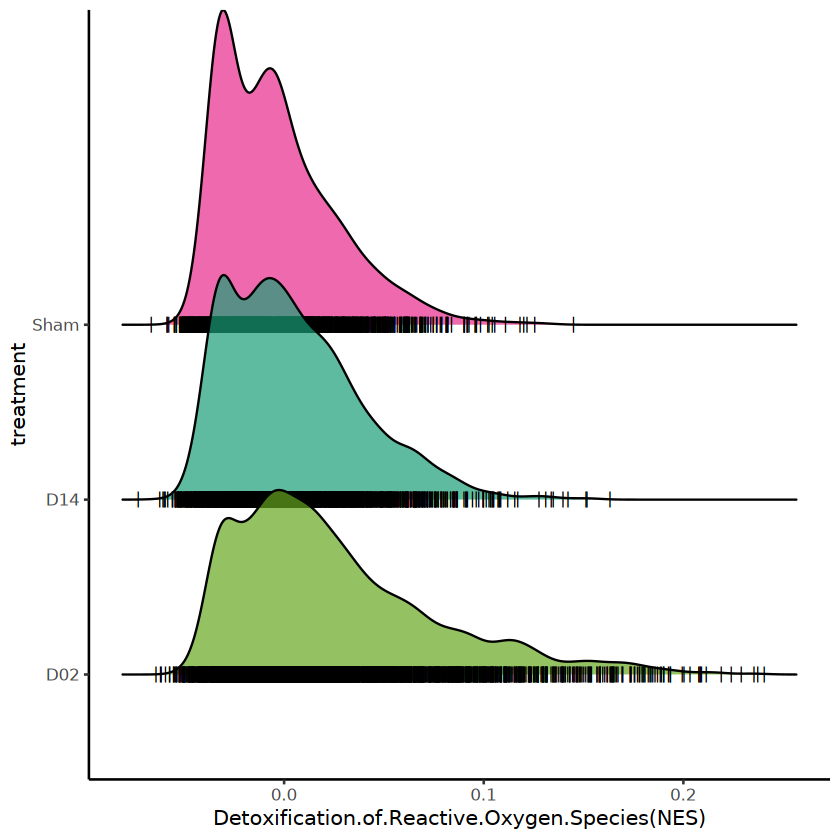

In [203]:
ridgePlot(res_EC, features = c("Detoxification.of.Reactive.Oxygen.Species"), group_by = "treatment")

In [209]:
df_find_pathway %>% arrange(adj.P.Val) %>% filter(grepl(x = term, pattern = 'hif', ignore.case = T)) %>% head()

logFC       AveExpr     t         P.Value      adj.P.Val    B        
1 0.005919591 -0.02554636 4.0818751 4.526603e-05 0.0000916111 -1.100318
2 0.001256954 -0.02554636 0.9604684 3.368590e-01 0.3678370718 -9.061677
  term                              comparision
1 PTK6.promotes.HIF1A.stabilization D14_vs_Sham
2 PTK6.promotes.HIF1A.stabilization D02_vs_Sham

Picking joint bandwidth of 0.00142



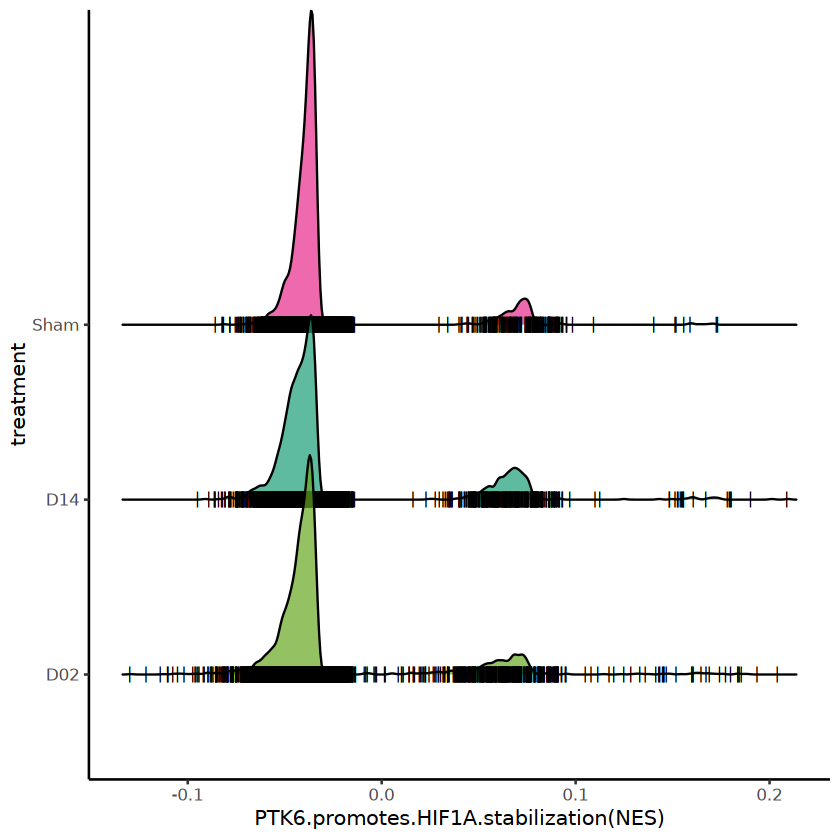

In [210]:
ridgePlot(res_EC, features = c("PTK6.promotes.HIF1A.stabilization"), group_by = "treatment")

In [212]:
df_sig_pathway_TF_reg %>% arrange(p.adj) %>% head(10)

Path  group1 group2 statistic p         p.adj        
1  Fosb  D02    D14     998771   1.03e-162 6.890700e-160
2  Jund  D02    D14    1030617   1.04e-152 3.478800e-150
3  Egr1  D02    D14    1093934   9.17e-134 2.044910e-131
4  Zic3  D02    D14    1112799   2.30e-128 3.846750e-126
5  Gata2 D02    D14    1133809   1.75e-122 2.341500e-120
6  Spi1  D02    Sham   3147736   8.81e-122 9.823150e-120
7  Jund  D02    Sham   1369644   1.03e-100  9.843857e-99
8  Klf2  D02    D14    1222763    3.91e-99  3.269737e-97
9  Thra  D02    D14    1234722    3.47e-96  2.579367e-94
10 Fosb  D02    Sham   1393809    3.76e-95  2.515440e-93

In [214]:
df_find_pathway_TF_reg %>% arrange(adj.P.Val) %>% head(10)

logFC        AveExpr      t         P.Value       adj.P.Val     B       
1   0.009847188  0.052032540  24.36645 5.150876e-125 1.148645e-122 272.9286
2   0.006111419  0.006977507  19.61476  4.975317e-83  1.109496e-80 176.5420
3  -0.025197243  0.105176605 -19.18575  1.267397e-79  1.413147e-77 168.6171
4   0.005589958  0.043823423  18.69199  8.733071e-76  9.737374e-74 159.9040
5  -0.005138760  0.029245079 -17.91950  5.867904e-70  4.361809e-68 146.4222
6  -0.004774391  0.022339633 -17.84015  2.262845e-69  1.261536e-67 145.0764
7  -0.004481641  0.071454769 -16.24014  4.739581e-58  2.113853e-56 119.0938
8  -0.002800378  0.021097438 -15.57164  1.319395e-53  4.903751e-52 108.8981
9  -0.005953686 -0.028267291 -15.49426  4.206031e-53  1.339921e-51 107.7434
10 -0.008301485  0.109389921 -15.01790  4.707294e-50  1.312158e-48 100.7518
   term   comparision
1  Spi1   D02_vs_Sham
2  Stat1  D14_vs_Sham
3  Gata2  D02_vs_Sham
4  Irf7   D14_vs_Sham
5  Jund   D02_vs_Sham
6  Fosb   D02_vs_Sham
7  Yy1    D02_vs_Sham
8  Rel    D02_vs_Sham
9  Dbp    D02_vs_Sham
10 Bcl11a D02_vs_Sham

===================================================================================

KERNEL DIED !


I will also try with Reactome pathway and GO:BP terms.\
I will also try for endothelial subclusters. Actually\
I need to revisit the GBonilla datasets and obtain endothelial\
subclusters. There are some cell populations that are more\
specific to or enriched in stroke D2, and D14 samples.

#########################################################

Sessioninfo from a previous time point:

In [51]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] tidyr_1.3.1            rlist_0.4.6.2          RColorBrewer_1.1-3    
 [4] viridis_0.6.5          viridisLite_0.4.2      rlang_1.1.4           
 [7] scales_1.3.0           reshape2_1.4.4         mosaic_1.9.1          
[10] mosaicData_0.20.4      ggformula_0.12.0       Matrix_1.7-1